In [ ]:
import pandas as pd

In [ ]:
 !ls
from google.colab import drive
drive.mount('/content/gdrive')

sample_data
Mounted at /content/gdrive


In [ ]:
cd 'gdrive/My Drive/523'

[Errno 2] No such file or directory: 'gdrive/My Drive/523'
/content/gdrive/My Drive/523


In [ ]:
# Original df 
orig_df = pd.read_csv("breast_cancer.csv")
miss_df = pd.read_csv("cancer_miss.csv")
imputed_df = pd.read_csv("breast_cancer_imputed.csv")

In [ ]:
orig_df.head()

Unnamed: 0   id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0           0  1.0        1.0        15.46         19.48          101.70   
1           1  2.0        2.0        12.89         13.12           81.89   
2           2  3.0        2.0        14.96         19.10           97.03   
3           3  4.0        2.0        12.94         16.17           83.18   
4           4  5.0        1.0        13.17         18.66           85.98   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0      748.9          0.10920           0.12230         0.14660   
1      515.9          0.06955           0.03729         0.02260   
2      687.3          0.08992           0.09823         0.05940   
3      507.6          0.09879           0.08836         0.03296   
4      534.6          0.11580           0.12310         0.12260   

   concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0              0.08087         0.1931                 0.05796     0.4743   
1              0.01171         0.1337                 0.05581     0.1532   
2              0.04819         0.1879                 0.05852     0.2877   
3              0.02390         0.1735                 0.06200     0.1458   
4              0.07340         0.2128                 0.06777     0.2871   

   texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0      0.7859        3.0940    48.31       0.006240         0.01484   
1      0.4690        1.1150    12.68       0.004731         0.01345   
2      0.9480        2.1710    24.87       0.005332         0.02115   
3      0.9050        0.9975    11.36       0.002887         0.01285   
4      0.8937        1.8970    24.25       0.006532         0.02336   

   concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0       0.02813           0.010930      0.01397              0.002461   
1       0.01652           0.005905      0.01619              0.002081   
2       0.01536           0.011870      0.01522              0.002815   
3       0.01613           0.007308      0.01870              0.001972   
4       0.02905           0.012150      0.01743              0.003643   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         19.26          26.00           124.90      1156.0           0.15460   
1         13.62          15.54            87.40       577.0           0.09616   
2         16.25          26.19           109.10       809.8           0.13130   
3         13.86          23.02            89.69       580.9           0.11720   
4         15.67          27.95           102.80       759.4           0.17860   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.2394           0.3791               0.15140          0.2837   
1             0.1147           0.1186               0.05366          0.2309   
2             0.3030           0.1804               0.14890          0.2962   
3             0.1958           0.1810               0.08388          0.3297   
4             0.4166           0.5006               0.20880          0.3900   

   fractal_dimension_worst  
0                  0.08019  
1                  0.06915  
2                  0.08472  
3                  0.07834  
4                  0.11790

In [ ]:
miss_df.head()

Unnamed: 0  Unnamed: 0.1   id  diagnosis  radius_mean  texture_mean  \
0           0           0.0  1.0        1.0        15.46         19.48   
1           1           1.0  NaN        2.0        12.89         13.12   
2           2           2.0  3.0        NaN        14.96           NaN   
3           3           3.0  4.0        2.0        12.94         16.17   
4           4           4.0  5.0        1.0        13.17         18.66   

   perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
0             NaN      748.9          0.10920           0.12230   
1           81.89      515.9          0.06955           0.03729   
2           97.03      687.3          0.08992           0.09823   
3           83.18      507.6          0.09879           0.08836   
4           85.98      534.6          0.11580           0.12310   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0         0.14660              0.08087         0.1931                 0.05796   
1             NaN              0.01171         0.1337                 0.05581   
2         0.05940              0.04819         0.1879                 0.05852   
3         0.03296              0.02390         0.1735                     NaN   
4         0.12260              0.07340            NaN                 0.06777   

   radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0     0.4743      0.7859        3.0940    48.31       0.006240   
1     0.1532      0.4690        1.1150    12.68       0.004731   
2     0.2877         NaN        2.1710    24.87       0.005332   
3     0.1458      0.9050        0.9975    11.36       0.002887   
4     0.2871         NaN        1.8970    24.25       0.006532   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0         0.01484           NaN           0.010930          NaN   
1         0.01345       0.01652           0.005905      0.01619   
2             NaN       0.01536           0.011870      0.01522   
3         0.01285       0.01613                NaN      0.01870   
4         0.02336       0.02905           0.012150      0.01743   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
0                   NaN         19.26          26.00           124.90   
1              0.002081         13.62          15.54            87.40   
2              0.002815         16.25          26.19           109.10   
3              0.001972         13.86            NaN            89.69   
4              0.003643         15.67          27.95           102.80   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1156.0           0.15460             0.2394           0.3791   
1       577.0           0.09616             0.1147           0.1186   
2       809.8           0.13130             0.3030           0.1804   
3       580.9           0.11720             0.1958           0.1810   
4         NaN               NaN             0.4166           0.5006   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.15140          0.2837                  0.08019  
1               0.05366          0.2309                  0.06915  
2               0.14890          0.2962                  0.08472  
3               0.08388          0.3297                  0.07834  
4               0.20880          0.3900                      NaN

In [ ]:
imputed_df.head()

Unnamed: 0  Unnamed: 0.1   id  diagnosis  radius_mean  texture_mean  \
0           0      0.000000  1.0        1.0    15.460000         19.48   
1           1      1.000000  2.0        2.0    12.006142         13.12   
2           2      2.000000  3.0        2.0    14.960000         19.10   
3           3      3.000000  4.0        2.0    12.396068         16.17   
4           4     42.809491  5.0        1.0    13.170000         18.66   

   perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
0      104.100181      748.9          0.10920           0.12230   
1       75.266103      515.9          0.06955           0.03729   
2       97.030000      687.3          0.08992           0.09823   
3       79.473270      507.6          0.09879           0.08836   
4       85.980000      534.6          0.11580           0.12310   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0         0.14660             0.080870       0.193100                 0.05796   
1         0.02260             0.011710       0.133700                 0.05581   
2         0.05940             0.045894       0.187900                 0.05852   
3         0.03296             0.023900       0.173500                 0.06200   
4         0.12260             0.073400       0.182284                 0.06777   

   radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0     0.4743      0.7859      3.094000    48.31       0.006240   
1     0.1532      0.4690      1.627055    12.68       0.004731   
2     0.2877      0.9480      2.171000    24.87       0.005332   
3     0.1458      0.9050      0.997500    11.36       0.002887   
4     0.2871      0.8937      1.897000    24.25       0.006532   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0         0.01484       0.02813           0.010930     0.017643   
1         0.01345       0.01652           0.005905     0.016190   
2         0.02115       0.01536           0.011870     0.015220   
3         0.01285       0.01613           0.007308     0.018700   
4         0.02336       0.02905           0.012150     0.017430   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
0              0.002461         19.26      26.000000           124.90   
1              0.002081         13.62      15.540000            87.40   
2              0.002815         16.25      26.190000           109.10   
3              0.001972         13.86      23.020000            89.69   
4              0.002286         15.67      25.952888           102.80   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1156.0          0.154600             0.2394         0.379100   
1       577.0          0.115862             0.1147         0.118600   
2       809.8          0.131300             0.3030         0.318950   
3       580.9          0.117200             0.1958         0.178588   
4       759.4          0.178600             0.4166         0.361780   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.15140        0.283700                 0.080190  
1               0.05366        0.230900                 0.069150  
2               0.14890        0.304403                 0.084720  
3               0.08388        0.329700                 0.078340  
4               0.20880        0.390000                 0.094232

In [ ]:
COLUMNS = orig_df.columns.to_list()

In [ ]:
COLUMNS = COLUMNS[2:]
print(COLUMNS)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
orig_df = orig_df[COLUMNS]
miss_df = miss_df[COLUMNS]
imputed_df = imputed_df[COLUMNS]

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.patches as mpatches
from sklearn import linear_model


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set style for plt
plt.style.use('tableau-colorblind10')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
imputed_df.columns = ["IMP"] + imputed_df.columns 

In [ ]:
miss_df.columns = ["MISS"] + miss_df.columns 

In [ ]:
df4 = orig_df.join(miss_df)
combined_df = df4.join(imputed_df)

In [ ]:

def getdf(df,col):
  col_mis = "MISS" + col
  col_imp = "IMP"+ col 
  idx = df[df[col_mis].isnull()].index.tolist()
  ans_df = df.iloc[idx]
  ans_df = ans_df[[col,col_imp]]
  return ans_df

In [ ]:
def plotlinegraph(df,x):
  plt.figure(figsize=(18, 10))
  sns.lineplot(data=df.tail(200))
  plt.title("Original and Imputed Values for feature " + x)
  plt.xlabel('records')
  plt.ylabel('value')
  plt.show()

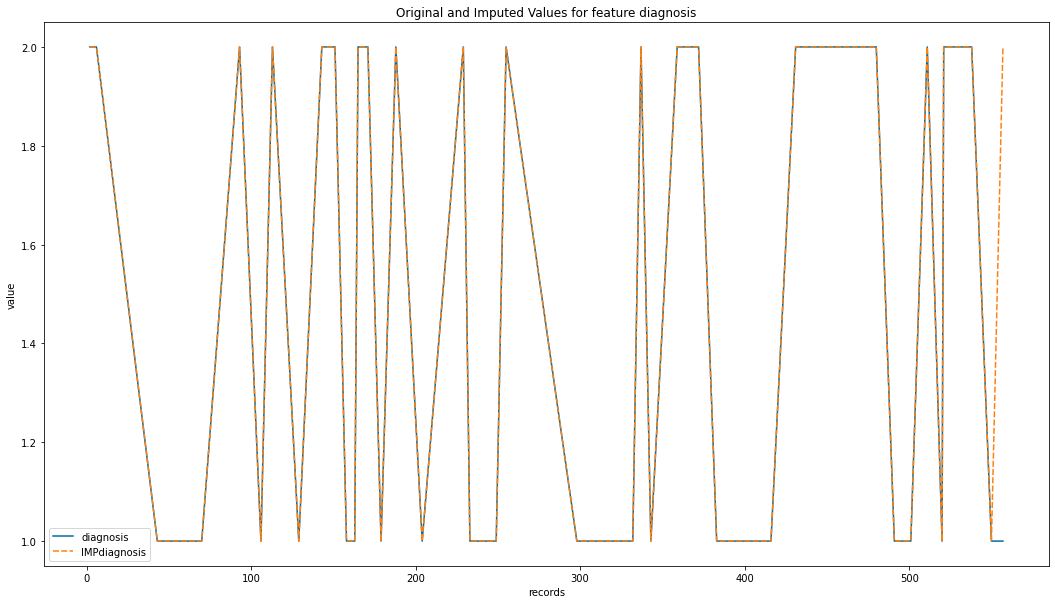

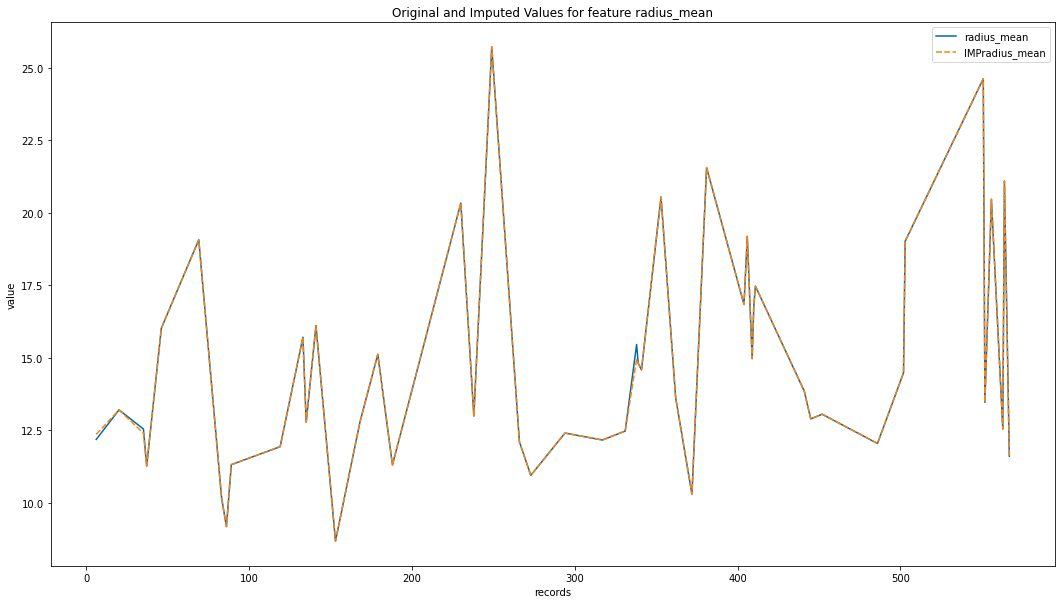

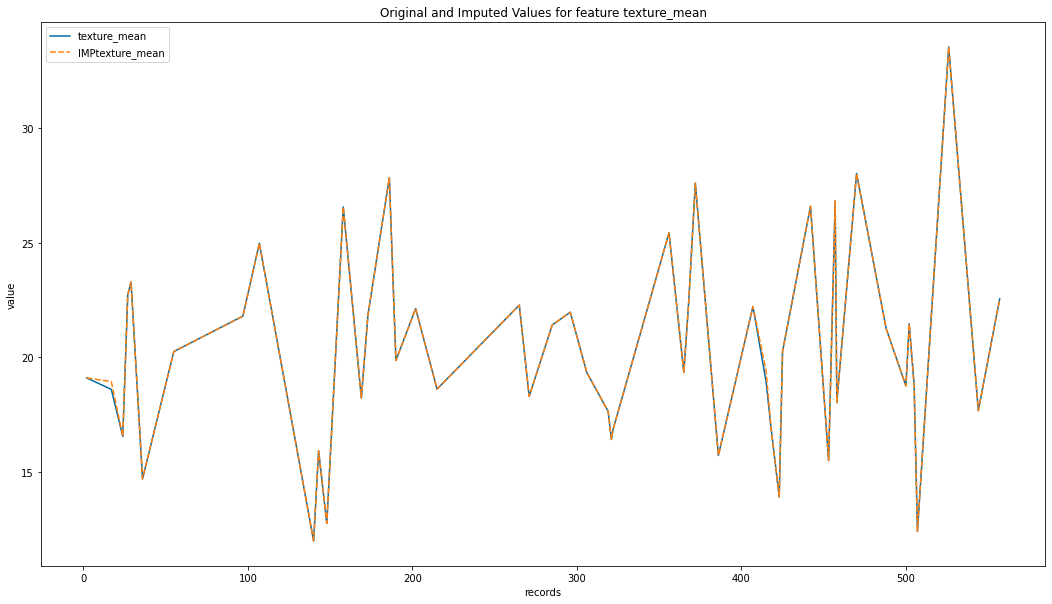

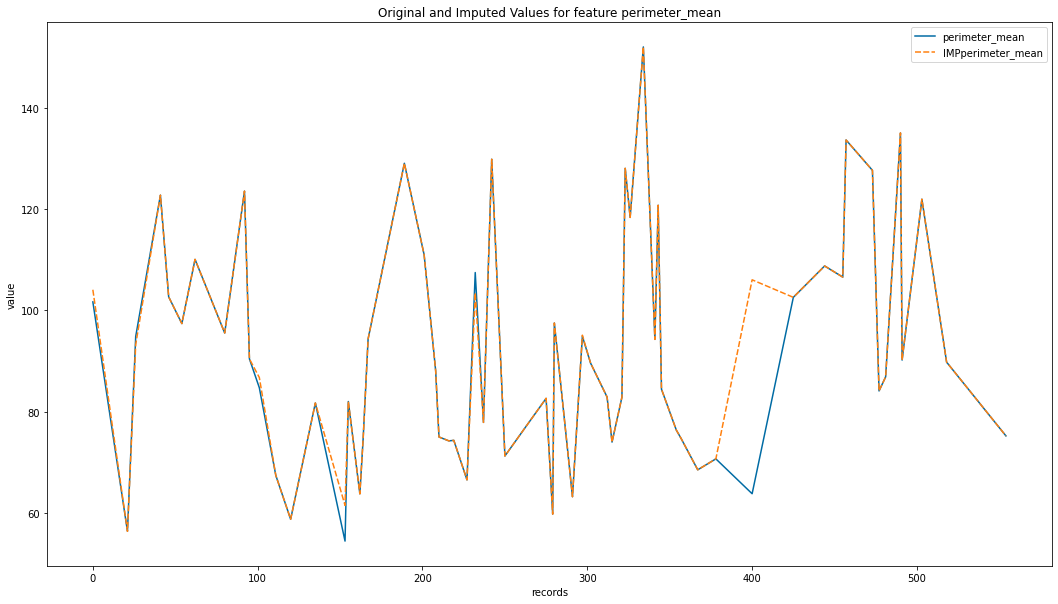

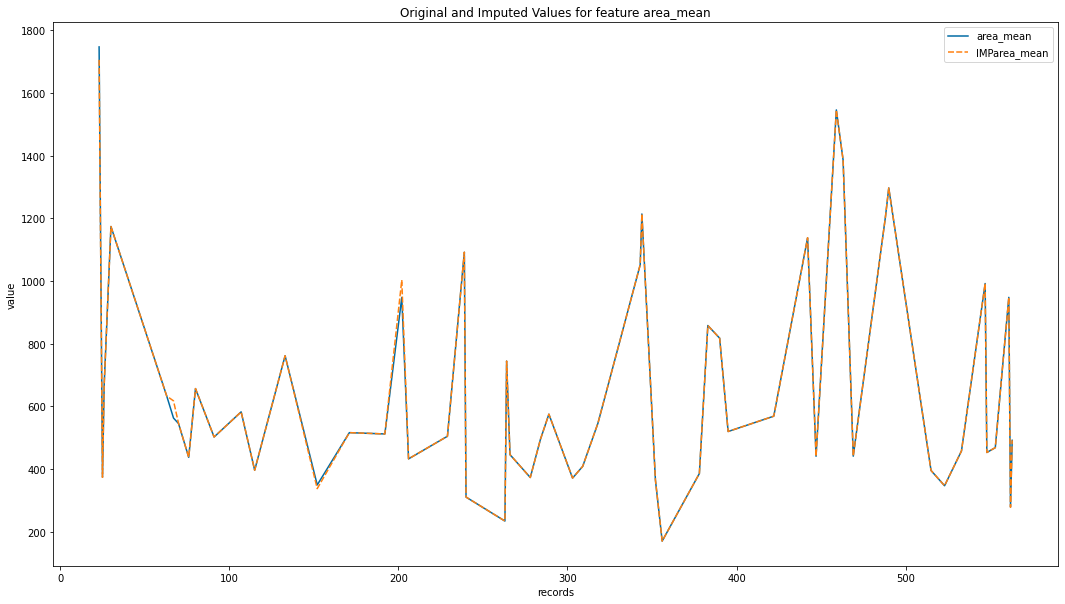

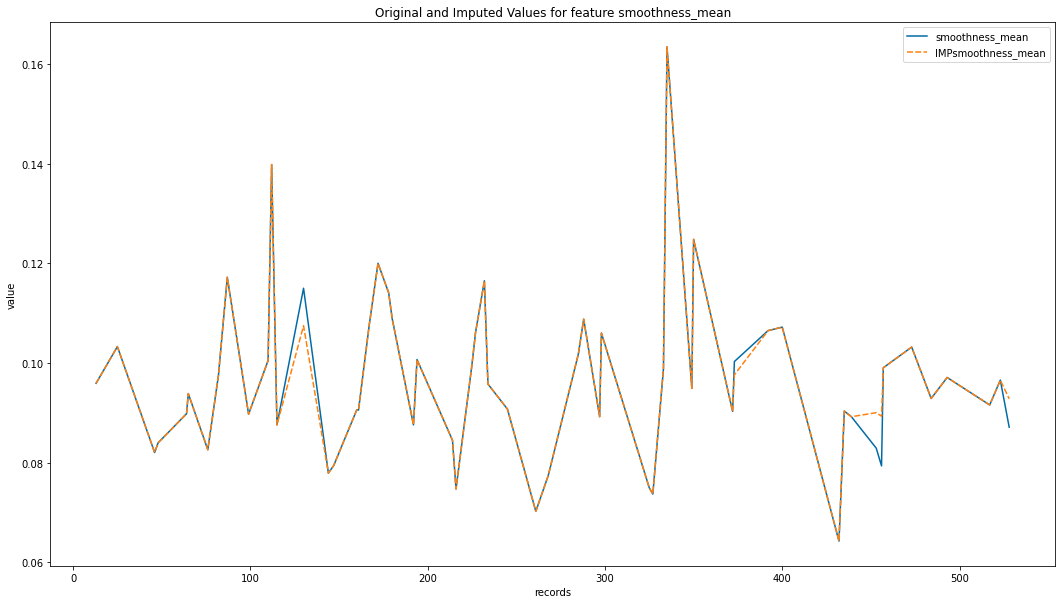

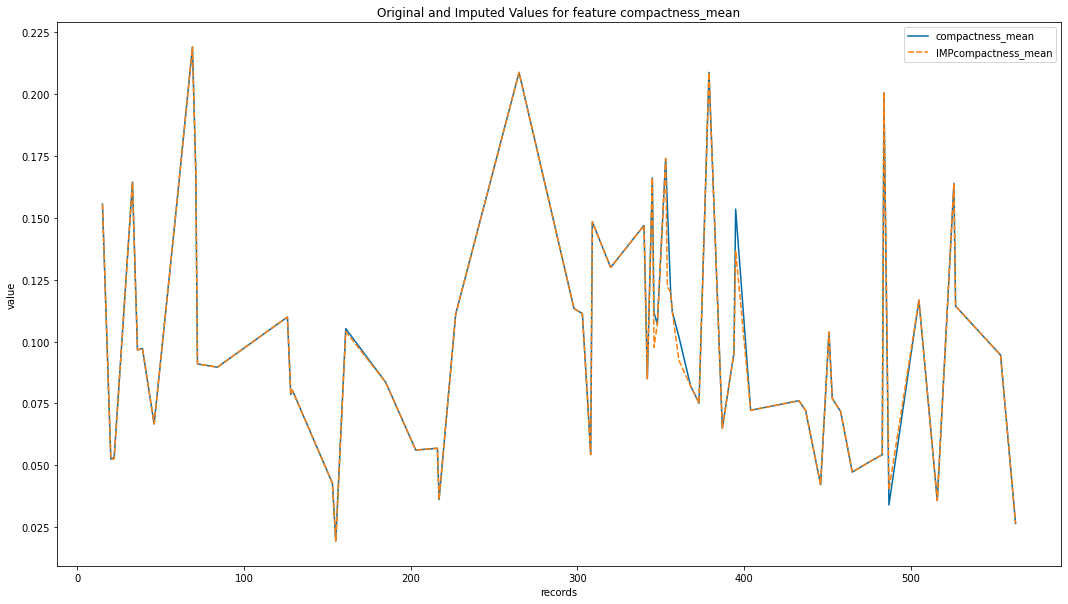

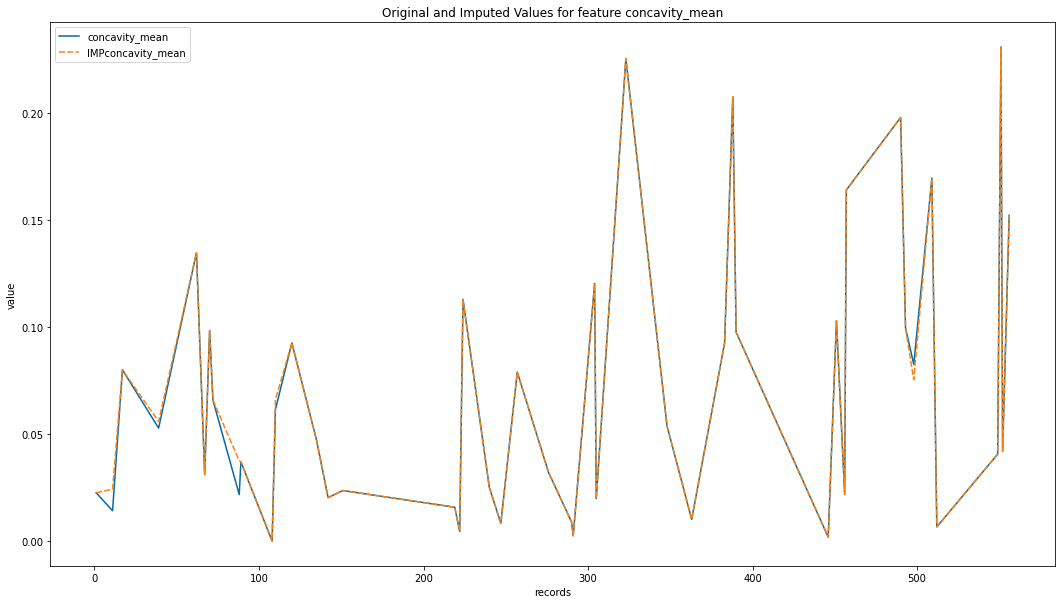

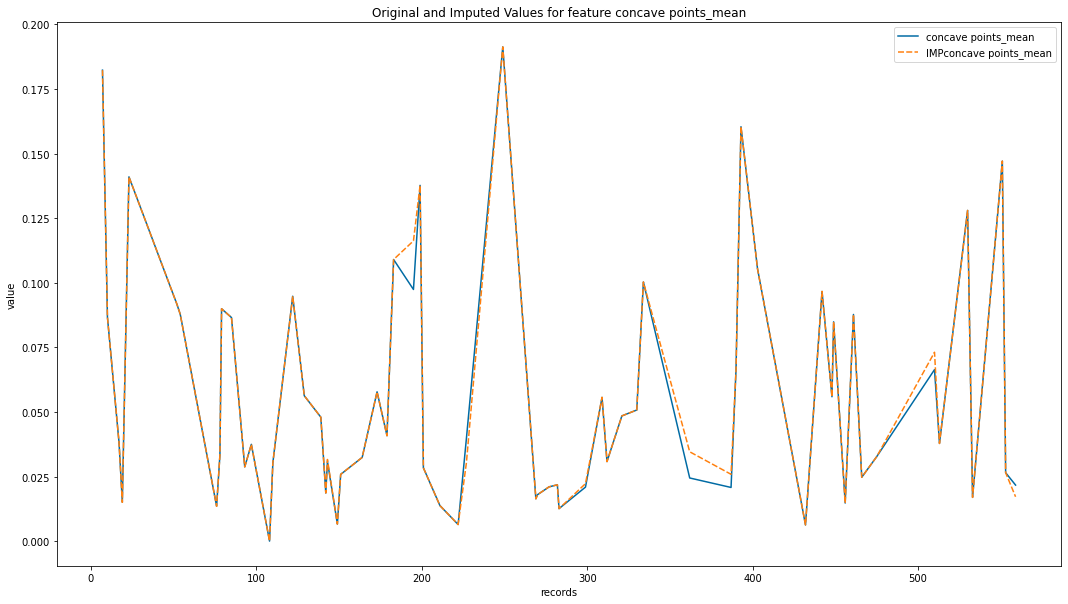

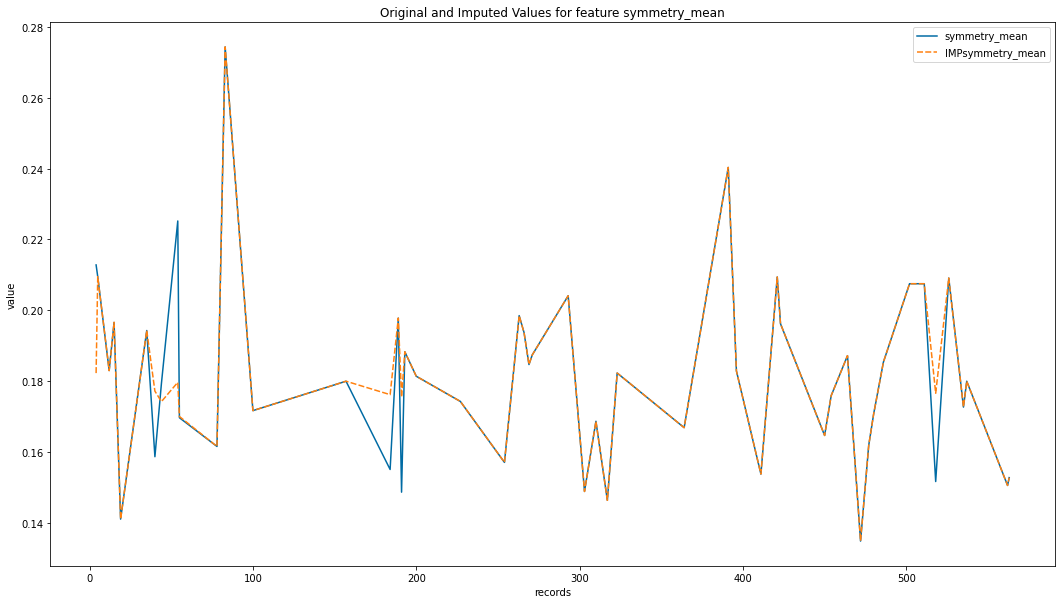

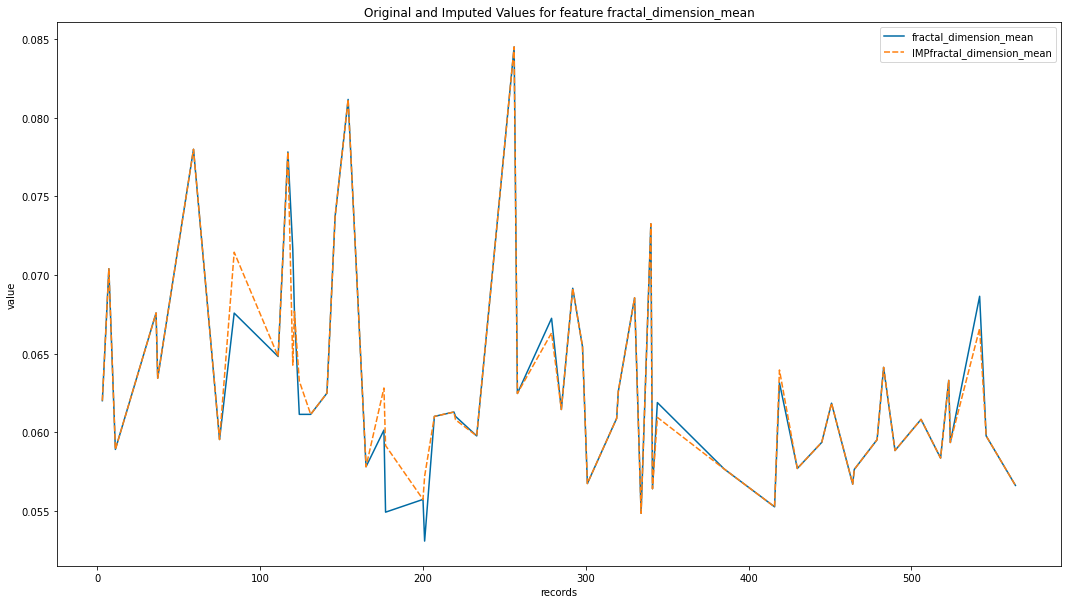

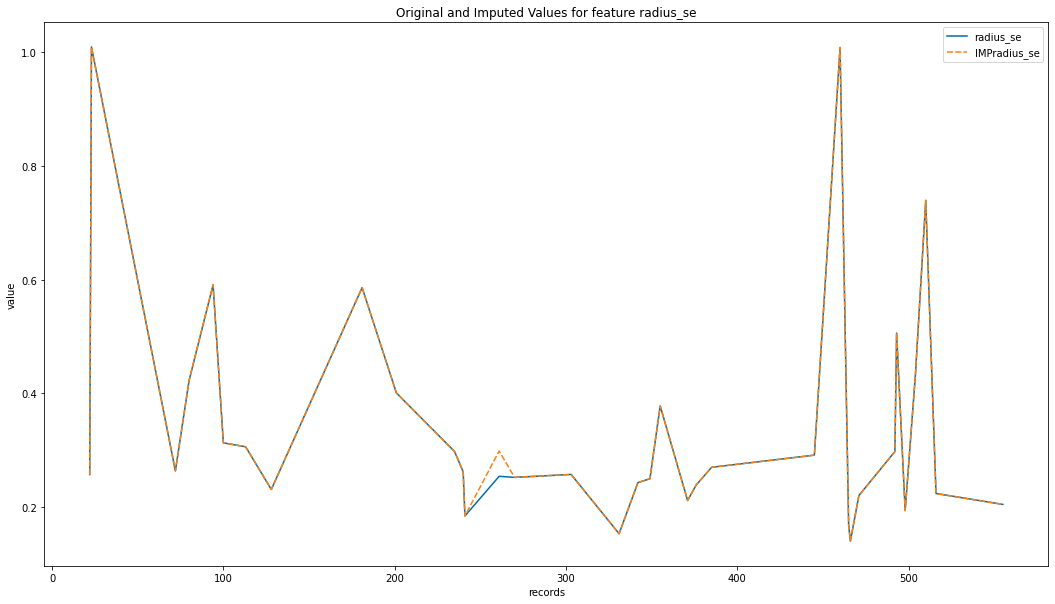

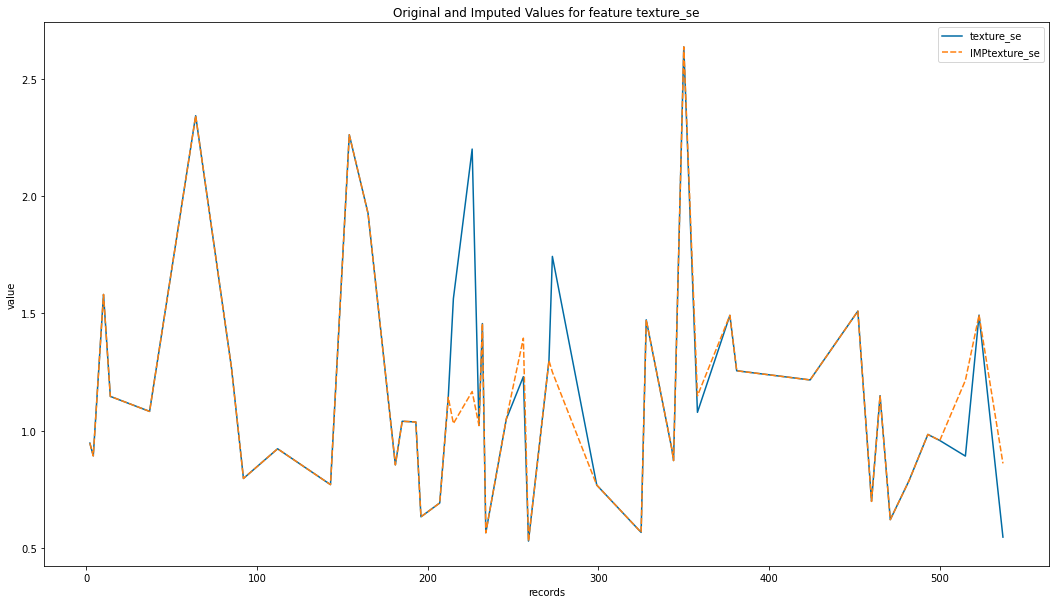

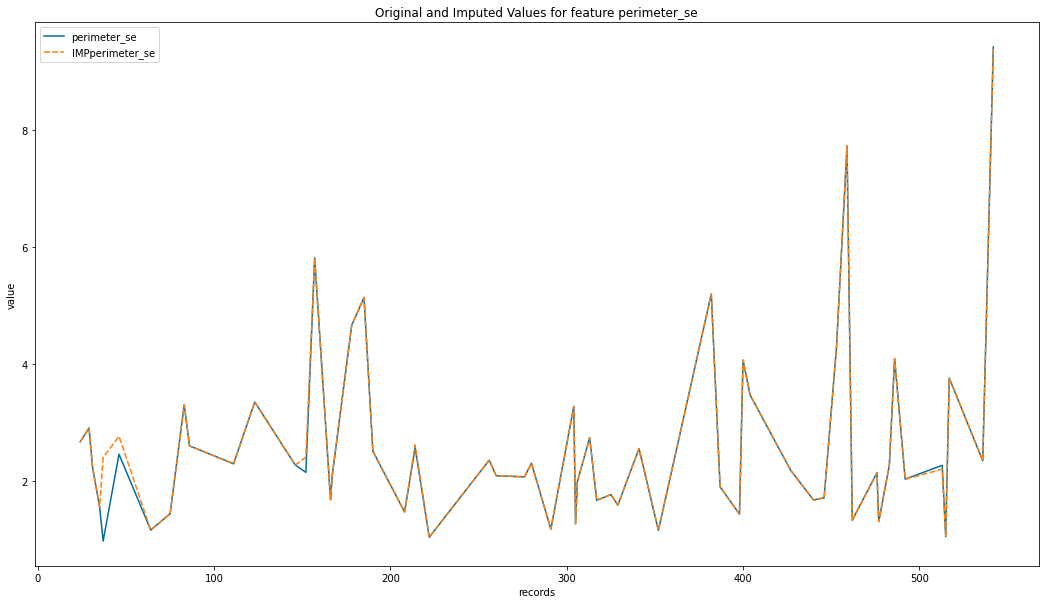

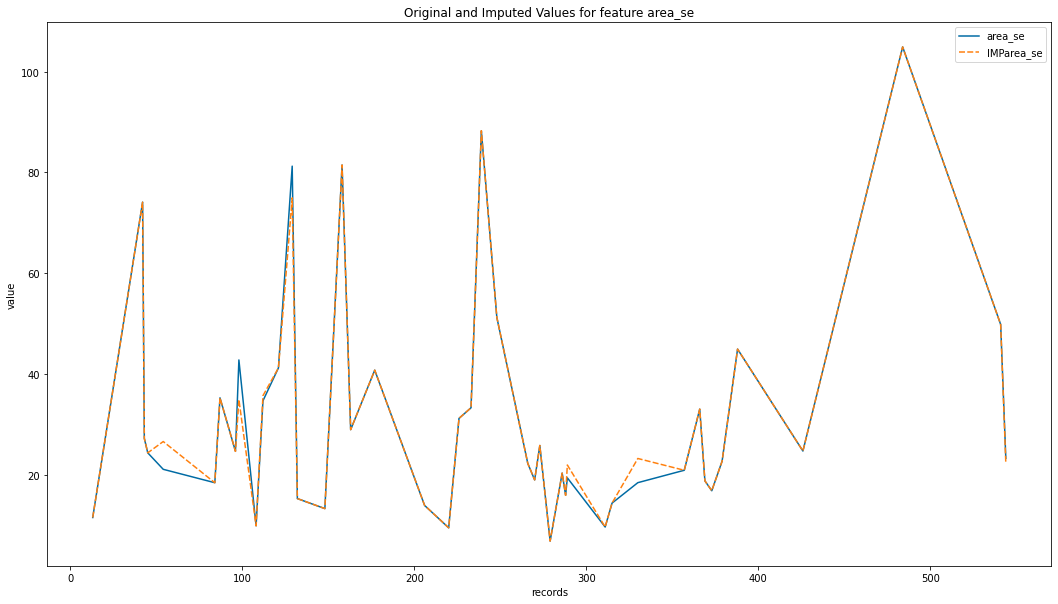

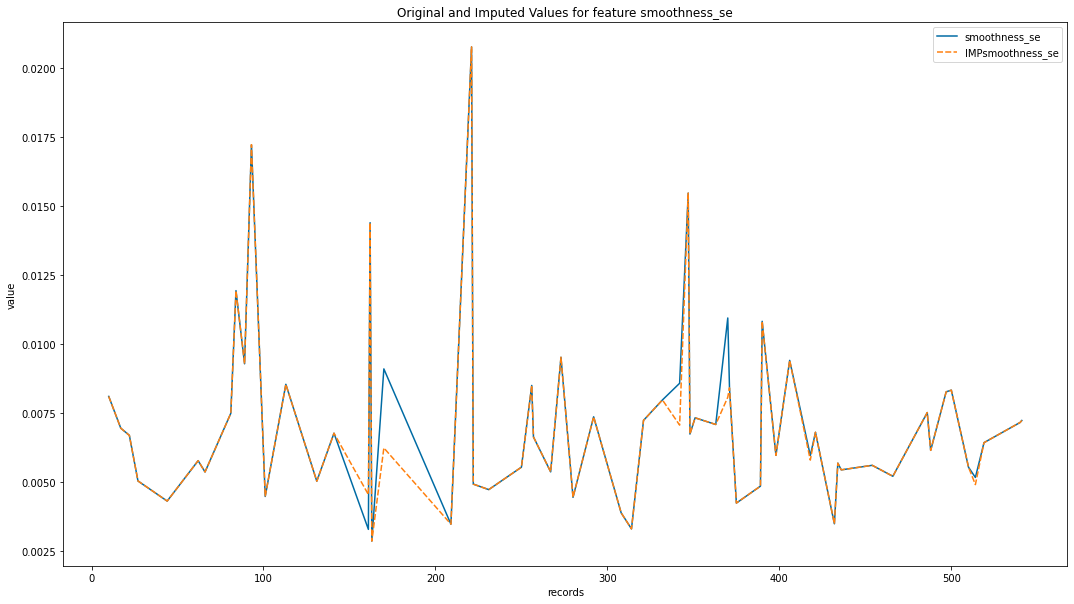

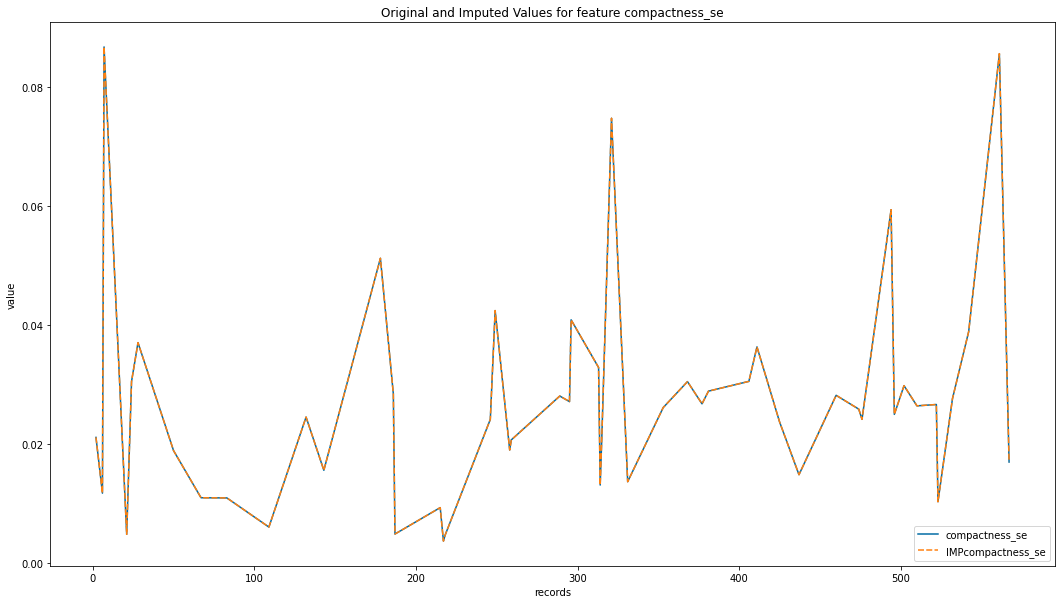

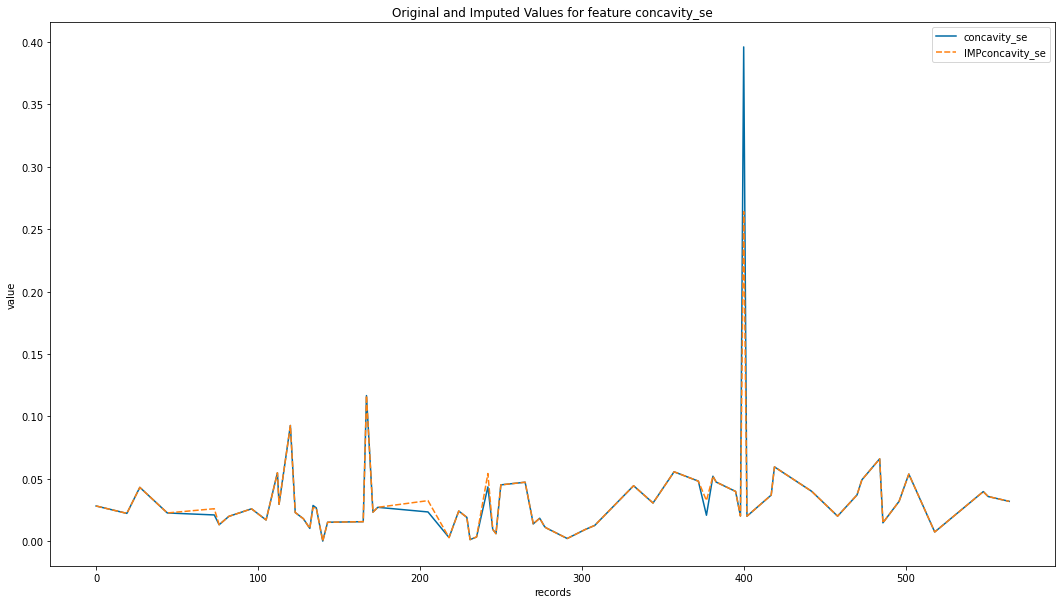

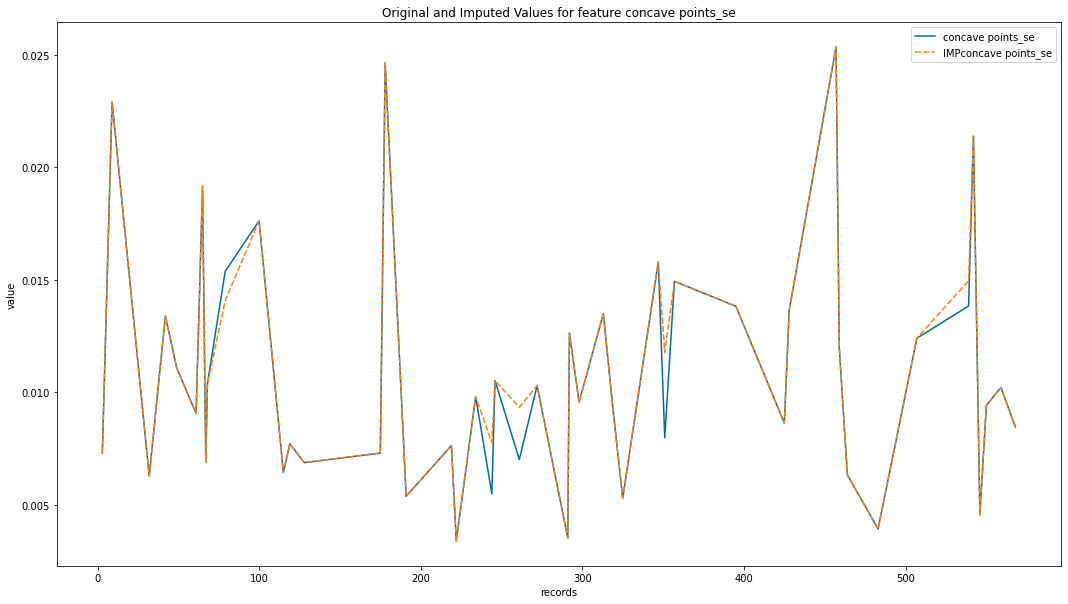

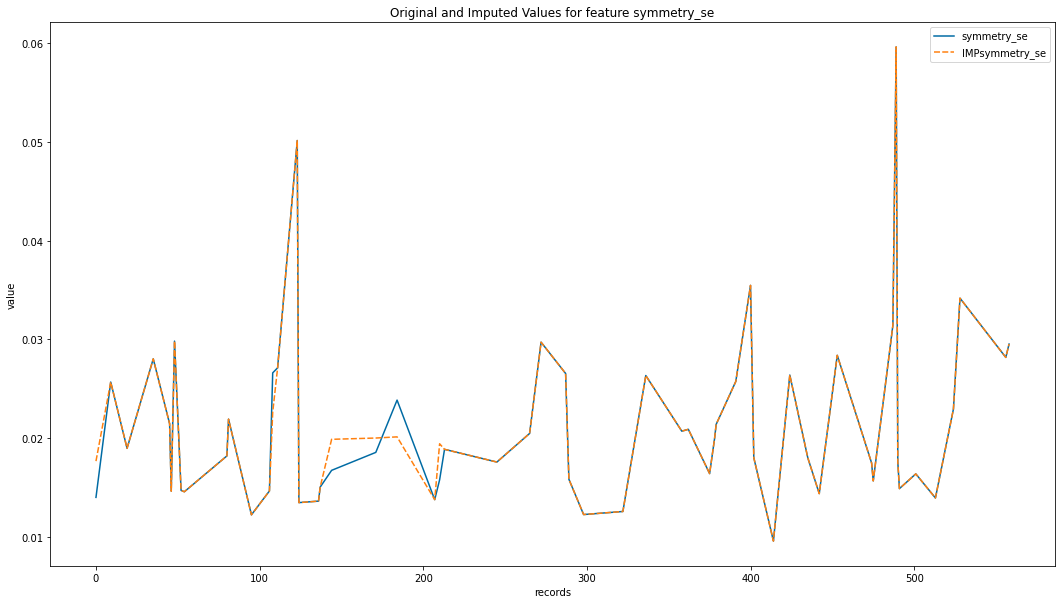

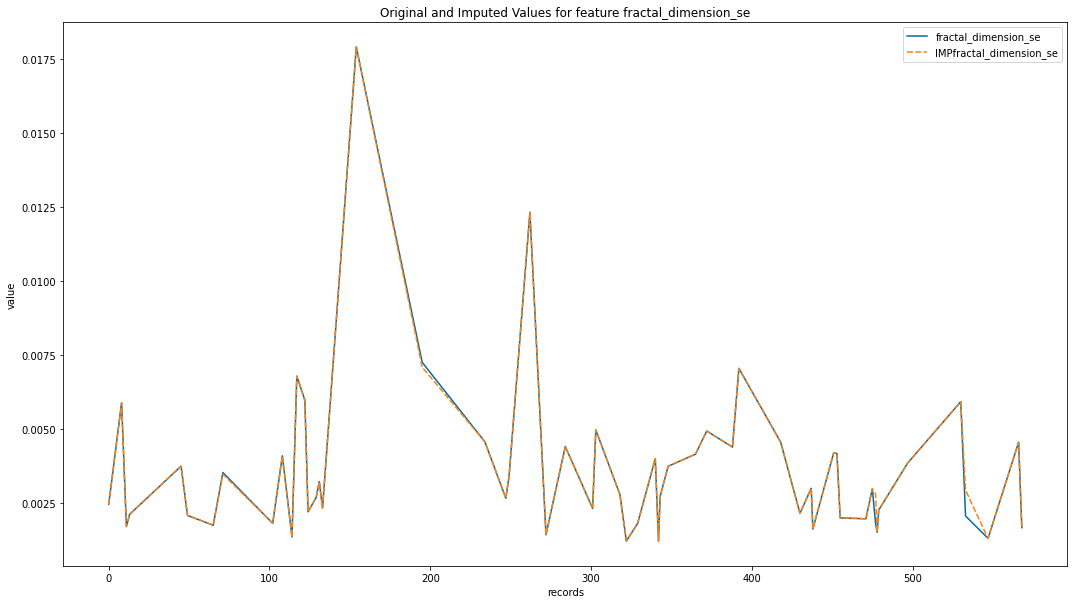

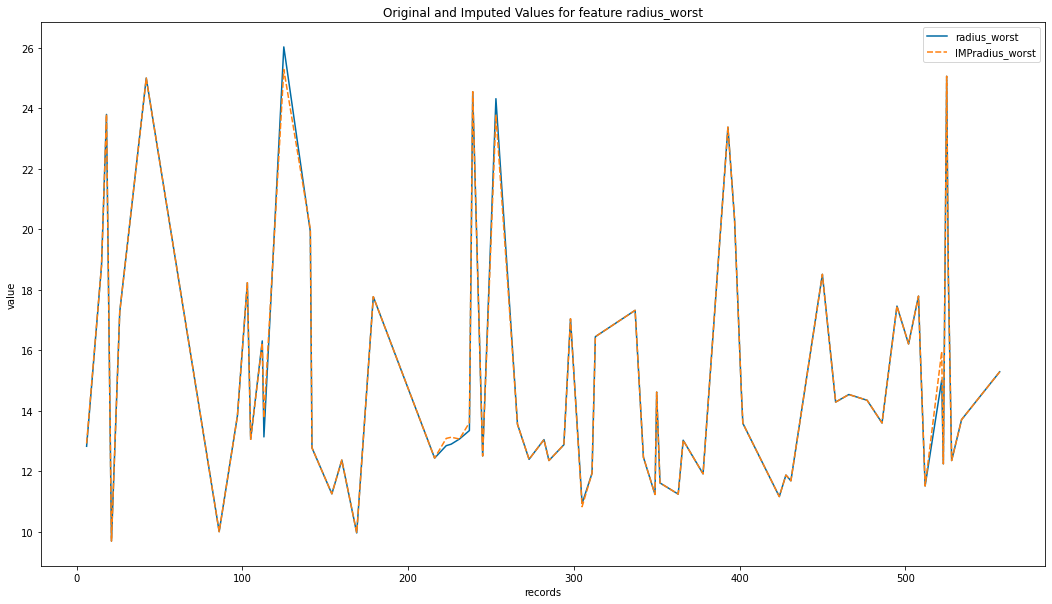

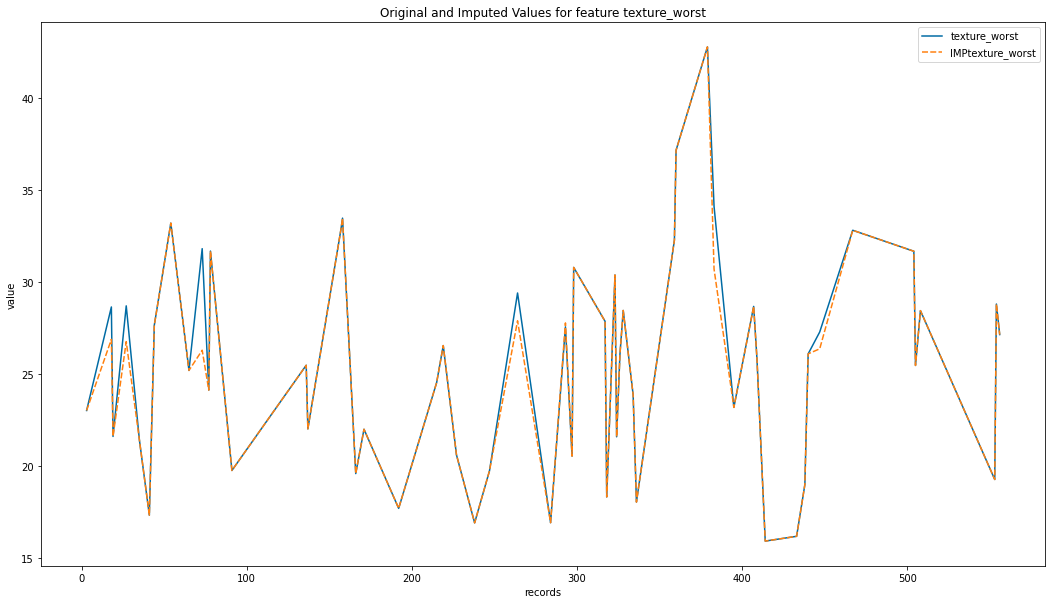

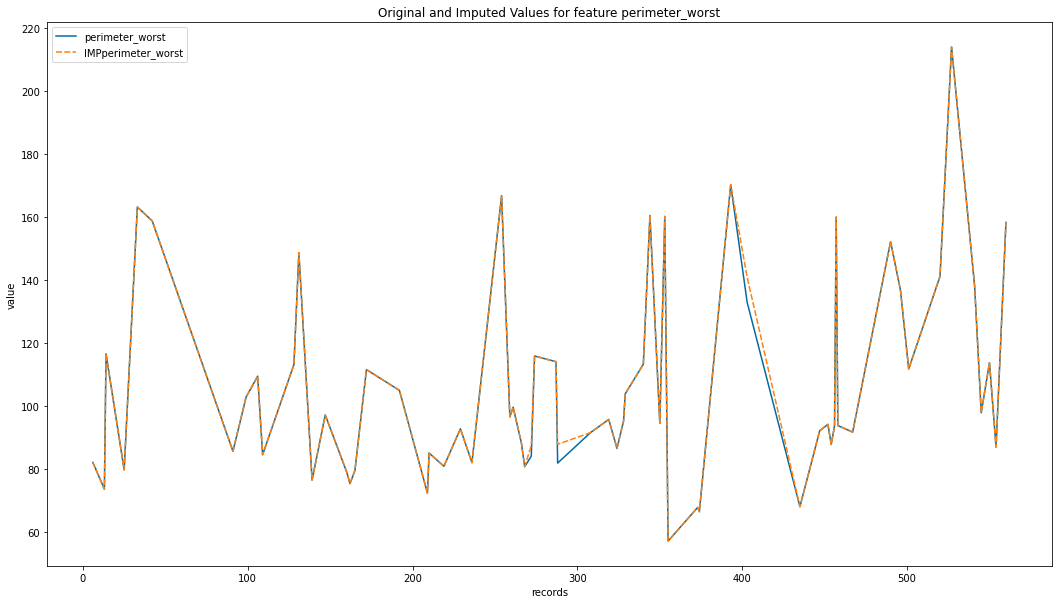

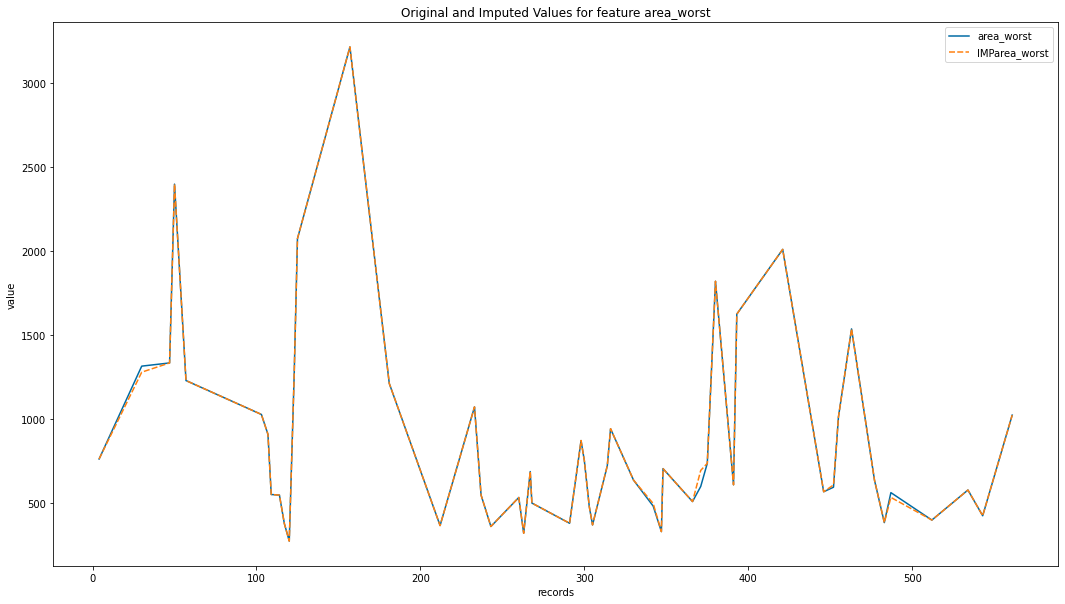

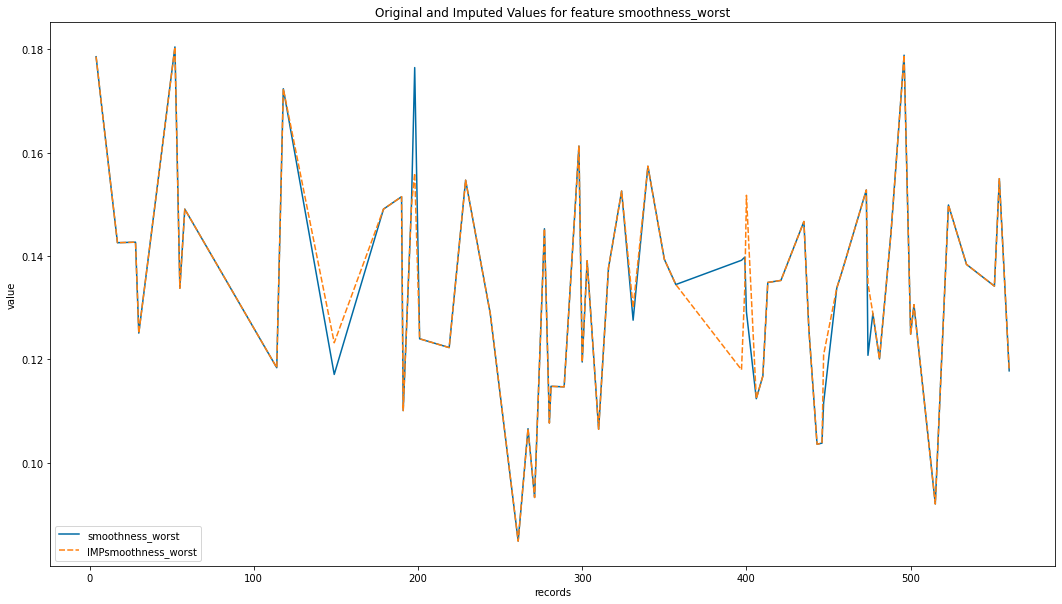

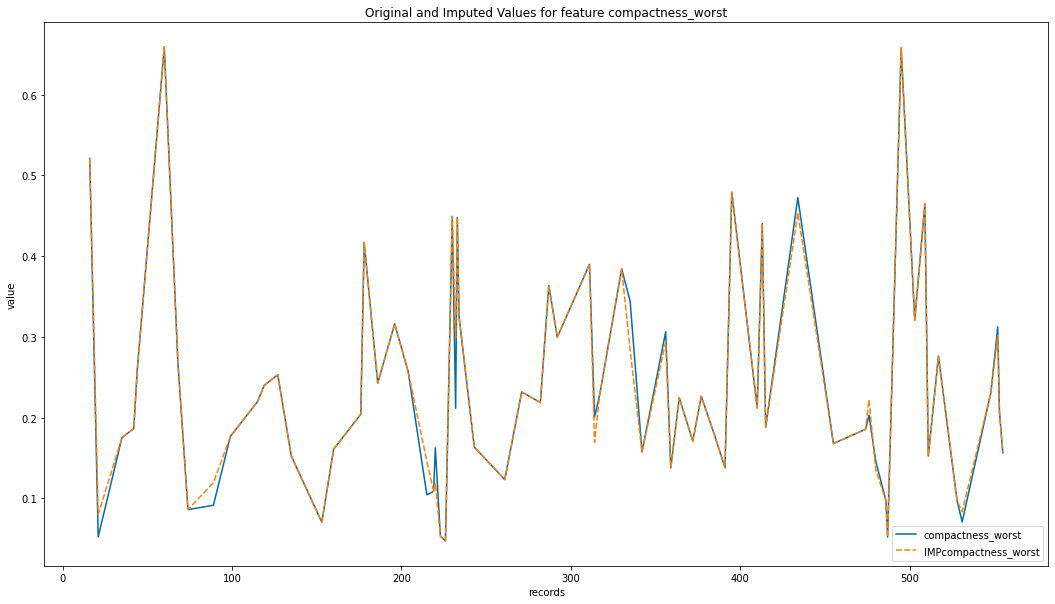

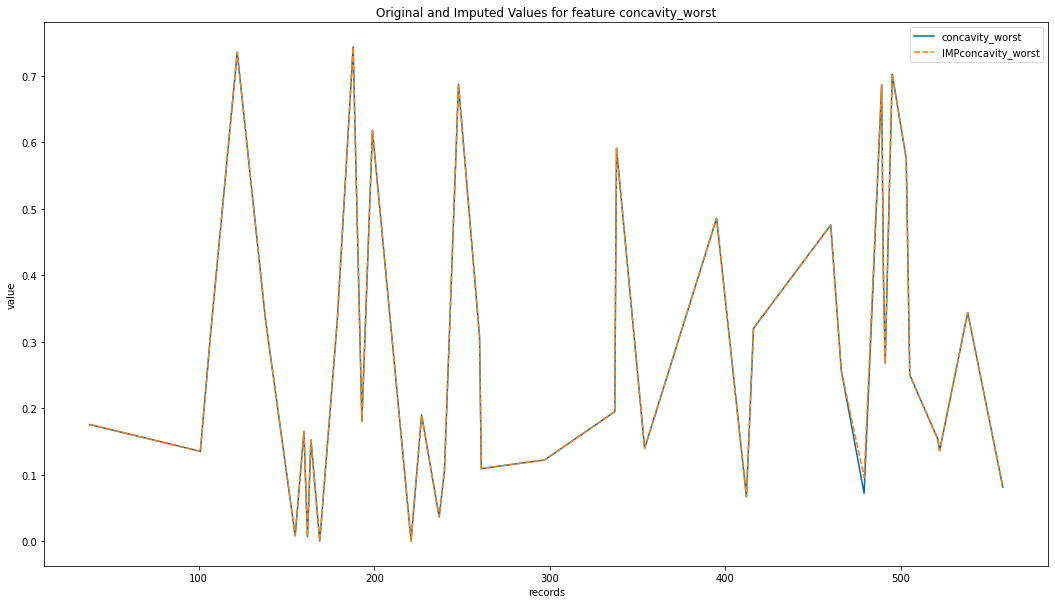

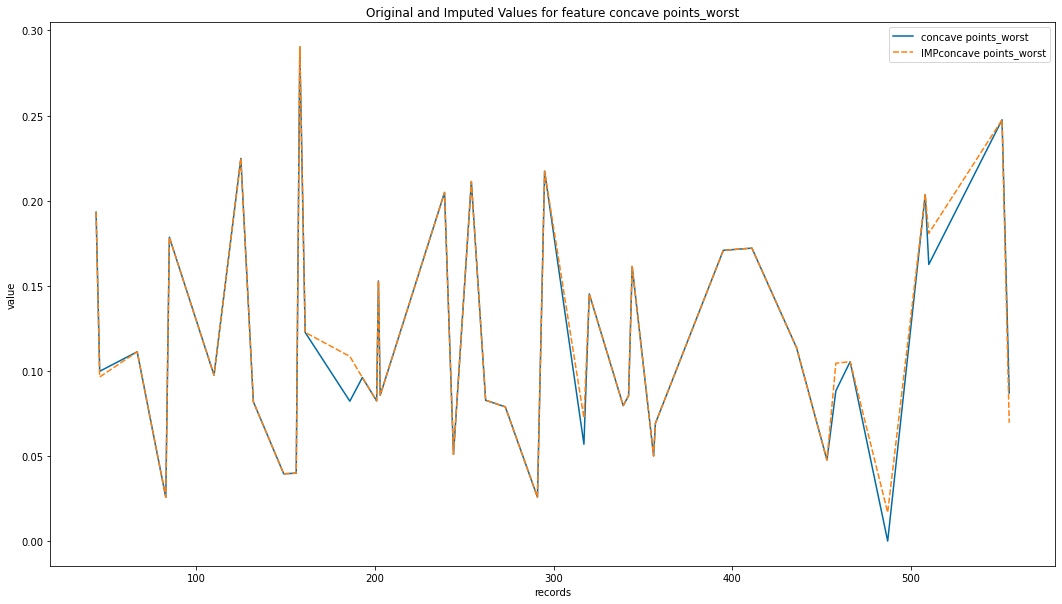

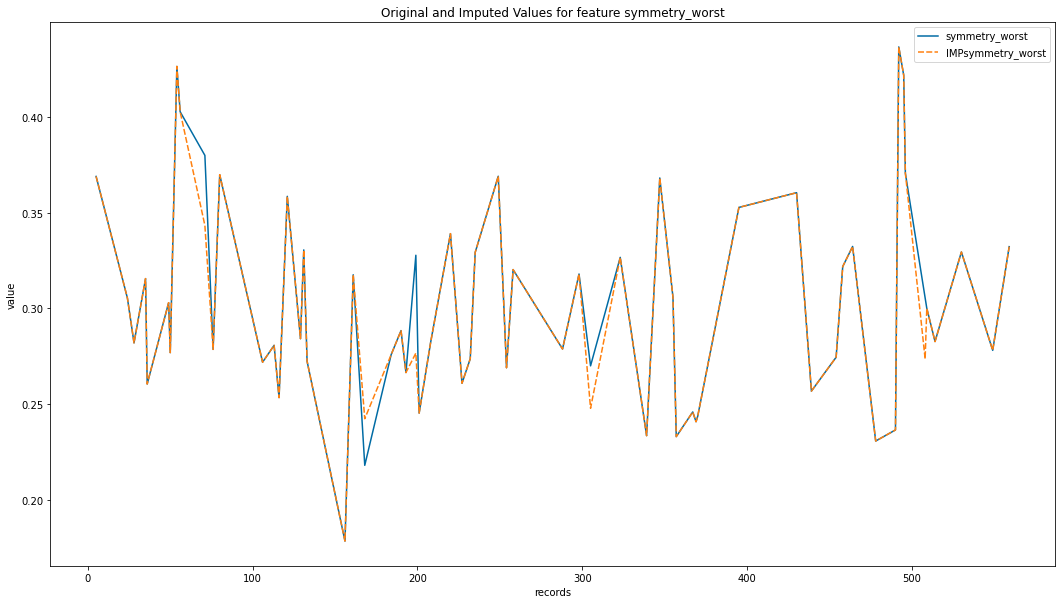

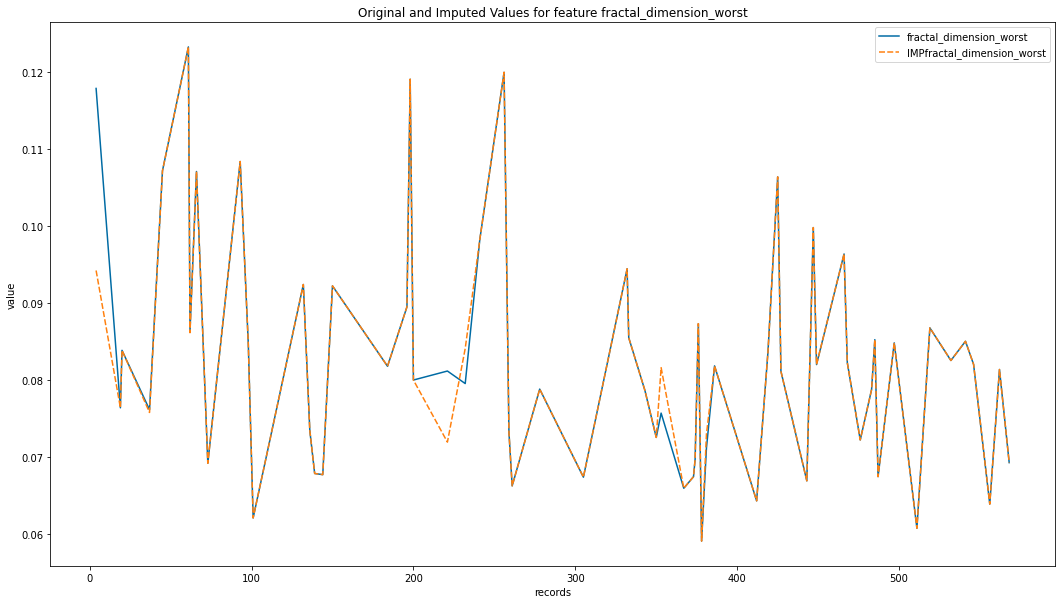

In [ ]:
for x in COLUMNS:
  temp_df = getdf(combined_df,x)
  plotlinegraph(temp_df,x)

In [ ]:
#percentage of imputed values within some error window

def getFeatureDataBarPlot(df):
  within_err = []
  error_allowed = 5
  all_err = []
  for col in COLUMNS:
    temp_df = getdf(df,col)
    col_imp =  'IMP' + col
    error_allowed = temp_df[col].std()/2 #/np.sqrt(len(temp_df[col]))
    all_err.append(error_allowed)

    x = temp_df[col] - temp_df[col_imp] 
    lst = x.to_list()
    count = len([i for i in lst if abs(i) < error_allowed]) 
    ans = count*100/len(temp_df[col])
    within_err.append(round(ans,2))

  print(within_err)

  ###bar plot code
  y_pos = np.arange(len(COLUMNS))
  
  ax = plt.figure(figsize=(12, 8))
  plt.barh(y_pos, within_err, align='center', alpha=0.5, color = "#ffb3b3")
  for index, value in enumerate(within_err):
    plt.text(value, index, str(value) + '%'+ '(+/-' + str(round(abs(all_err[index]),2)) +')' , verticalalignment='center')
  plt.yticks(y_pos, COLUMNS)
  plt.xlabel('percentage')
  plt.ylabel('features')
  plt.title('Features within CI')
  plt.show()

[98.0, 100.0, 100.0, 98.39, 100.0, 98.31, 98.46, 100.0, 100.0, 88.24, 93.1, 100.0, 89.58, 98.28, 100.0, 96.77, 100.0, 98.51, 97.87, 100.0, 100.0, 100.0, 96.49, 100.0, 100.0, 93.85, 98.59, 100.0, 100.0, 95.24, 96.83]


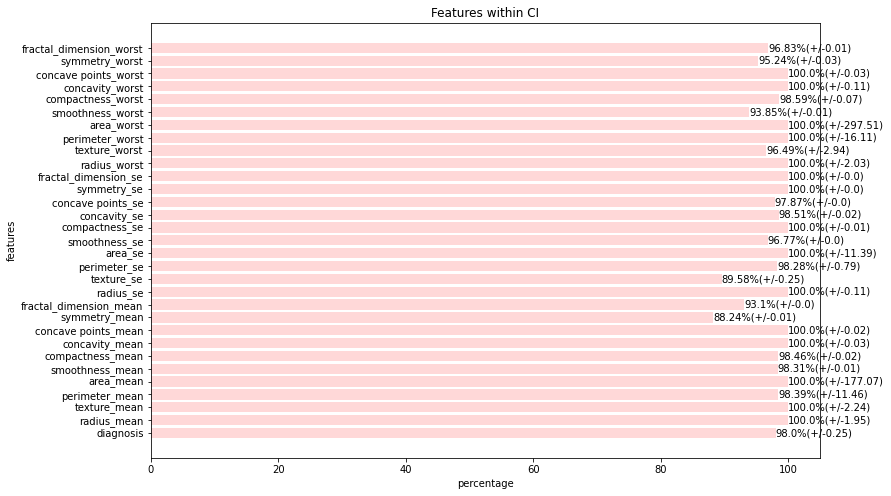

In [ ]:
getFeatureDataBarPlot(combined_df)

In [ ]:
combined_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        1.0        15.46         19.48          101.70      748.9   
1        2.0        12.89         13.12           81.89      515.9   
2        2.0        14.96         19.10           97.03      687.3   
3        2.0        12.94         16.17           83.18      507.6   
4        1.0        13.17         18.66           85.98      534.6   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10920           0.12230         0.14660              0.08087   
1          0.06955           0.03729         0.02260              0.01171   
2          0.08992           0.09823         0.05940              0.04819   
3          0.09879           0.08836         0.03296              0.02390   
4          0.11580           0.12310         0.12260              0.07340   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.1931                 0.05796     0.4743      0.7859        3.0940   
1         0.1337                 0.05581     0.1532      0.4690        1.1150   
2         0.1879                 0.05852     0.2877      0.9480        2.1710   
3         0.1735                 0.06200     0.1458      0.9050        0.9975   
4         0.2128                 0.06777     0.2871      0.8937        1.8970   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0    48.31       0.006240         0.01484       0.02813           0.010930   
1    12.68       0.004731         0.01345       0.01652           0.005905   
2    24.87       0.005332         0.02115       0.01536           0.011870   
3    11.36       0.002887         0.01285       0.01613           0.007308   
4    24.25       0.006532         0.02336       0.02905           0.012150   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.01397              0.002461         19.26          26.00   
1      0.01619              0.002081         13.62          15.54   
2      0.01522              0.002815         16.25          26.19   
3      0.01870              0.001972         13.86          23.02   
4      0.01743              0.003643         15.67          27.95   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           124.90      1156.0           0.15460             0.2394   
1            87.40       577.0           0.09616             0.1147   
2           109.10       809.8           0.13130             0.3030   
3            89.69       580.9           0.11720             0.1958   
4           102.80       759.4           0.17860             0.4166   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.3791               0.15140          0.2837   
1           0.1186               0.05366          0.2309   
2           0.1804               0.14890          0.2962   
3           0.1810               0.08388          0.3297   
4           0.5006               0.20880          0.3900   

   fractal_dimension_worst  MISSdiagnosis  MISSradius_mean  MISStexture_mean  \
0                  0.08019            1.0            15.46             19.48   
1                  0.06915            2.0            12.89             13.12   
2                  0.08472            NaN            14.96               NaN   
3                  0.07834            2.0            12.94             16.17   
4                  0.11790            1.0            13.17             18.66   

   MISSperimeter_mean  MISSarea_mean  MISSsmoothness_mean  \
0                 NaN          748.9              0.10920   
1               81.89          515.9              0.06955   
2               97.03          687.3              0.08992   
3               83.18          507.6              0.09879   
4               85.98          534.6              0.11580   

   MISScompactness_mean  MISSconcavity_mean  MISSconcave points_mean  \
0               0.12230             0.14

In [ ]:
# sns.regplot(x="total_bill", y="tip", data=tips);

# Regression scatterplot using seaborn 

###function to plot scatter plus linear of original + imputed
def plotscatterLR(df,cl):
  cl_imp = "IMP" + cl 
  ax = plt.figure(figsize=(24, 8))
  p1 = sns.regplot(x=df.index,y=[df[cl]],data=df, fit_reg=True, label='Original') 
  p2 = sns.regplot(x=df.index,y=[df[cl_imp]],data=df, fit_reg=True, label='Imputed') 

  plt.legend(loc='upper left')
  plt.title(cl)
  plt.show()

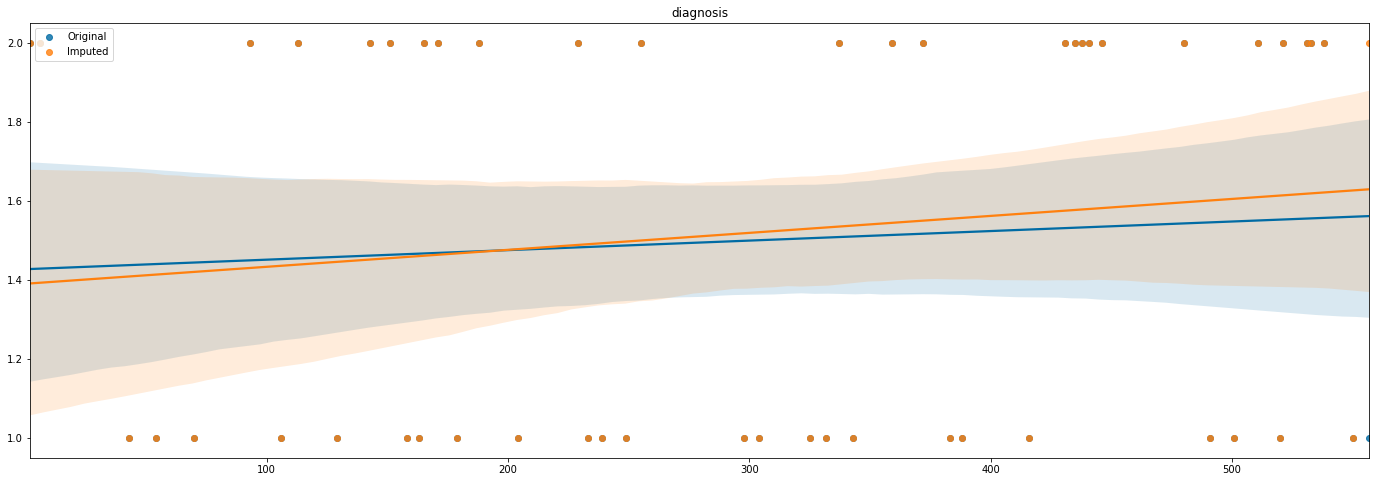

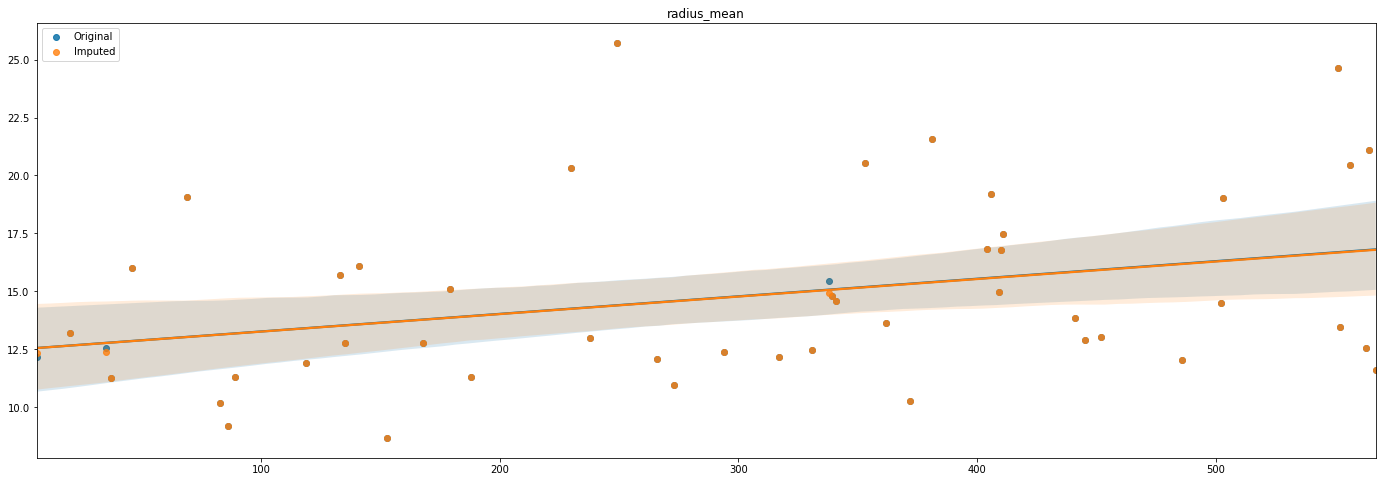

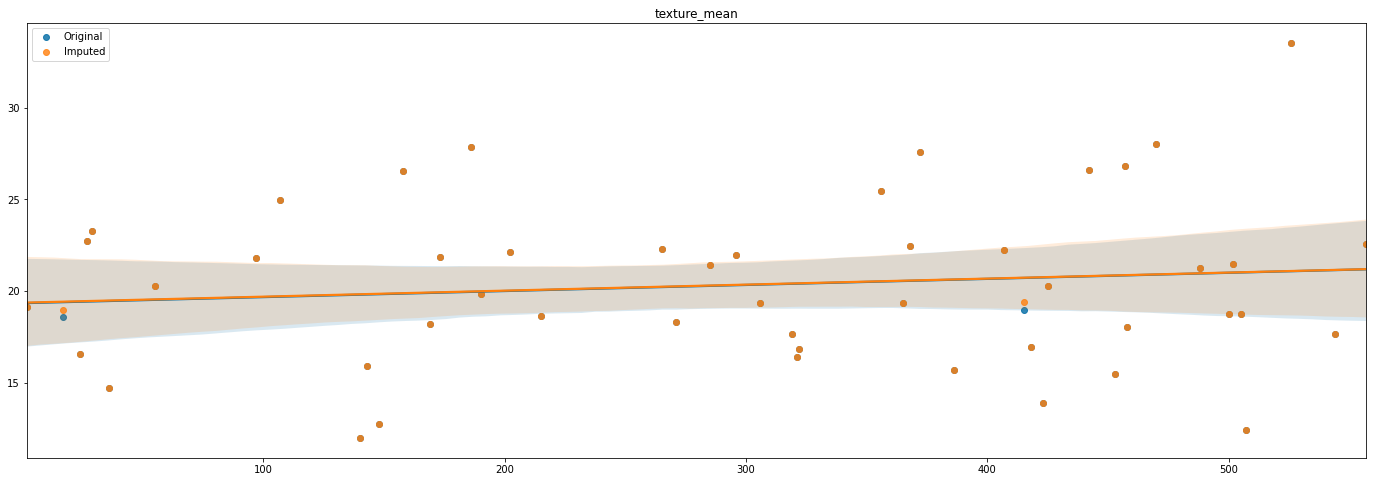

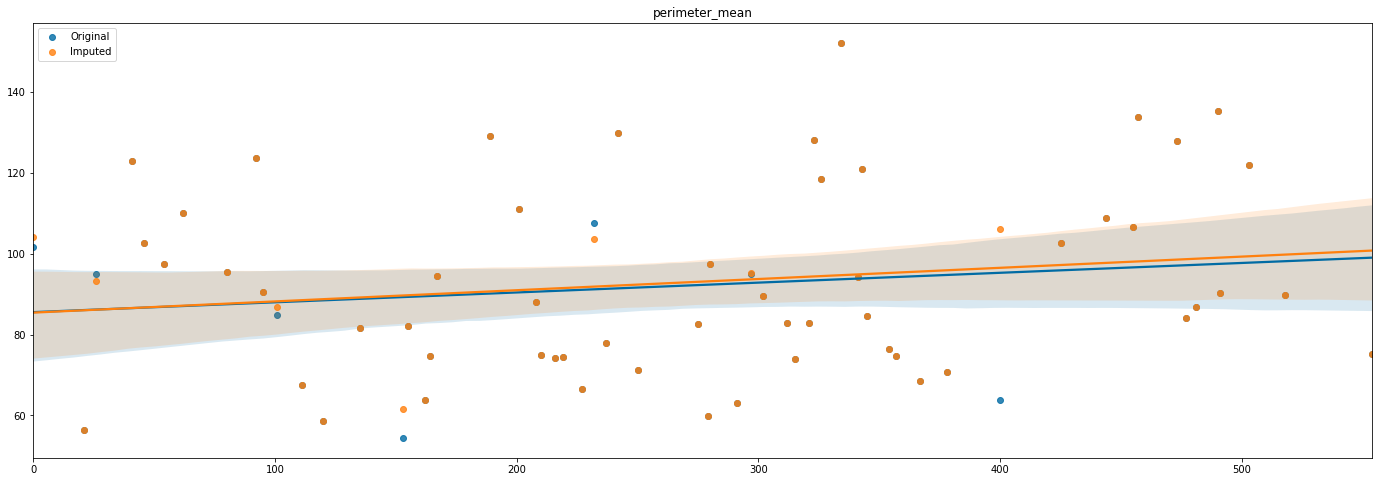

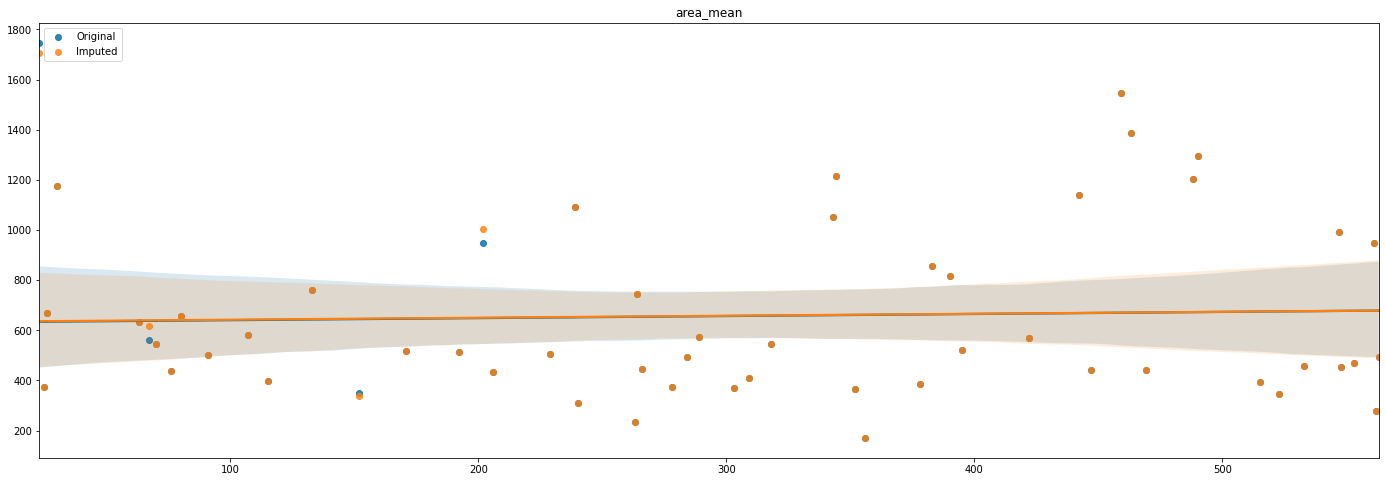

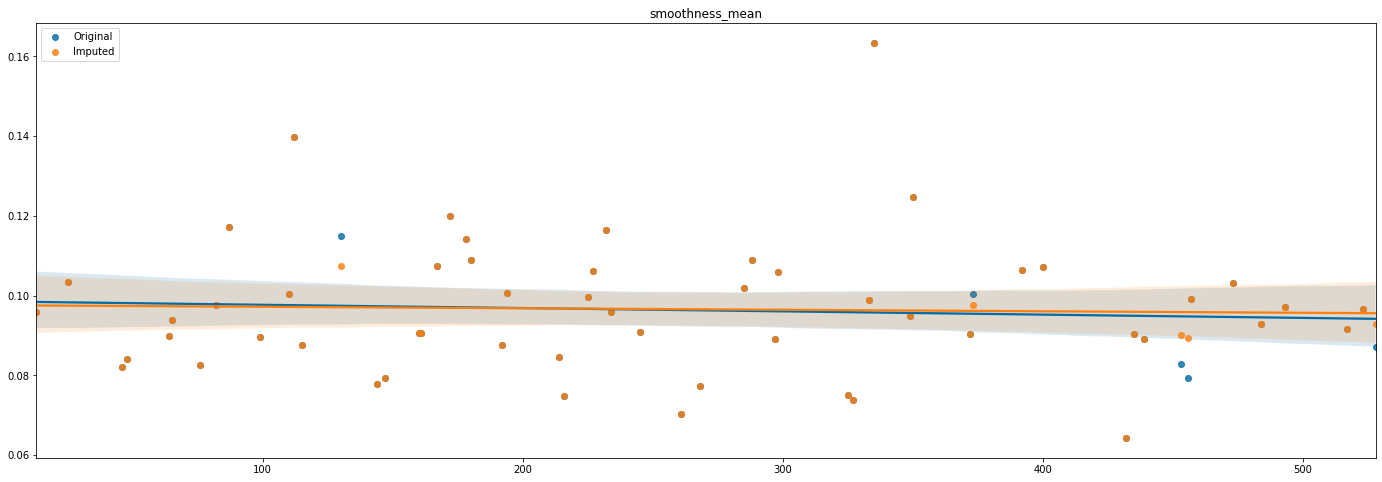

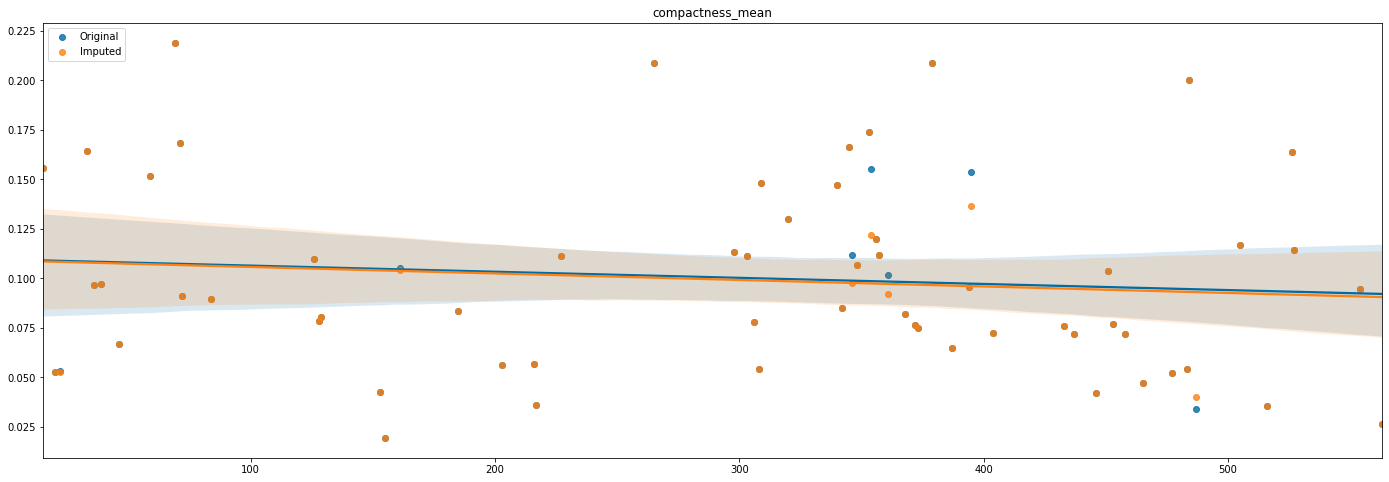

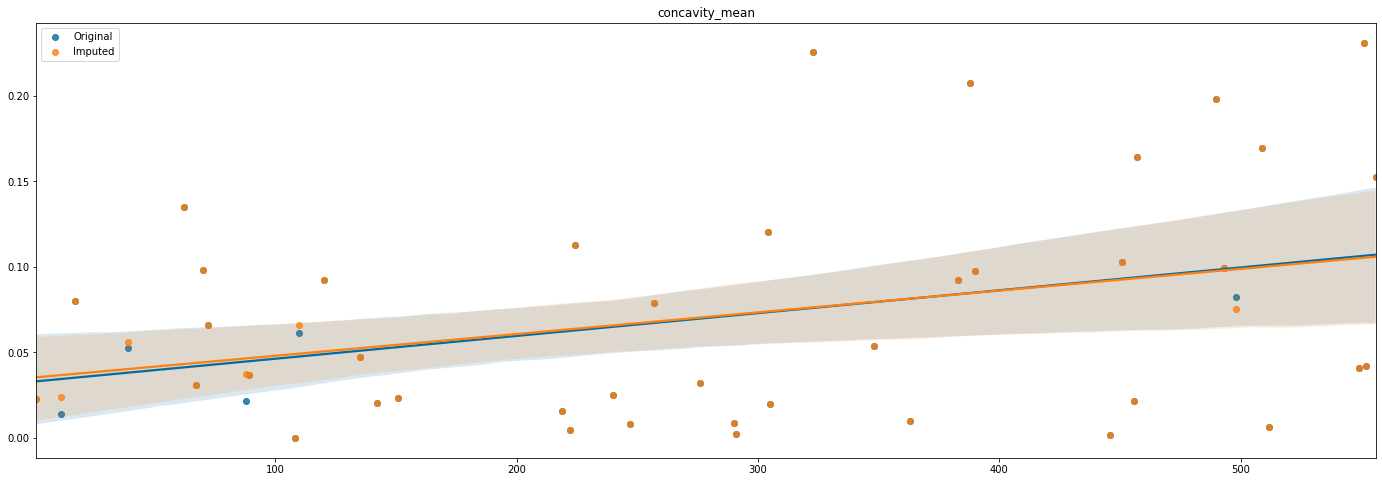

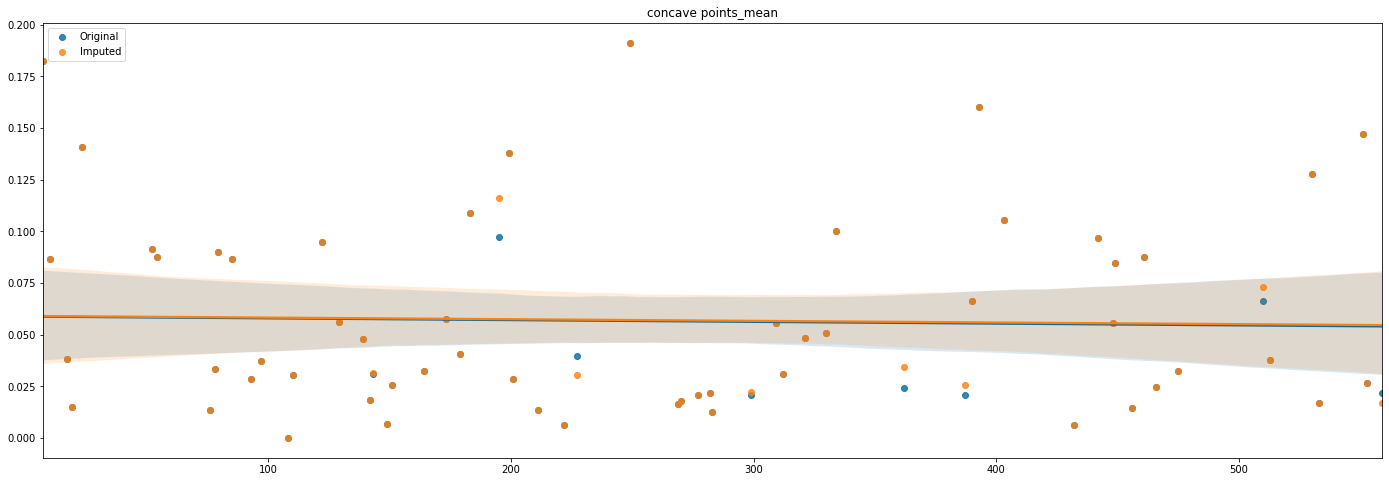

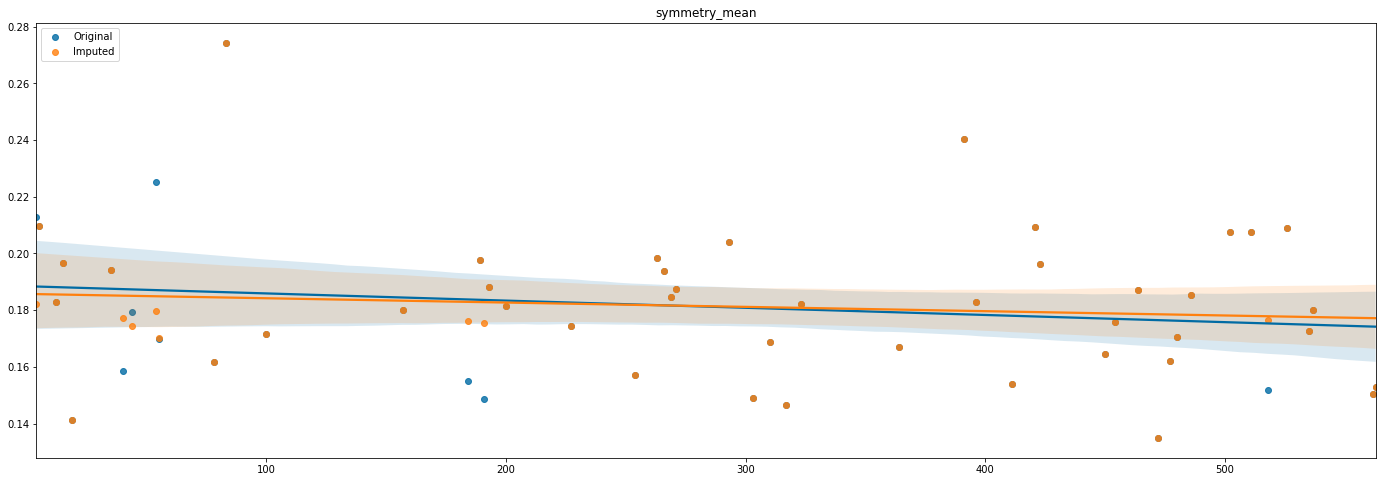

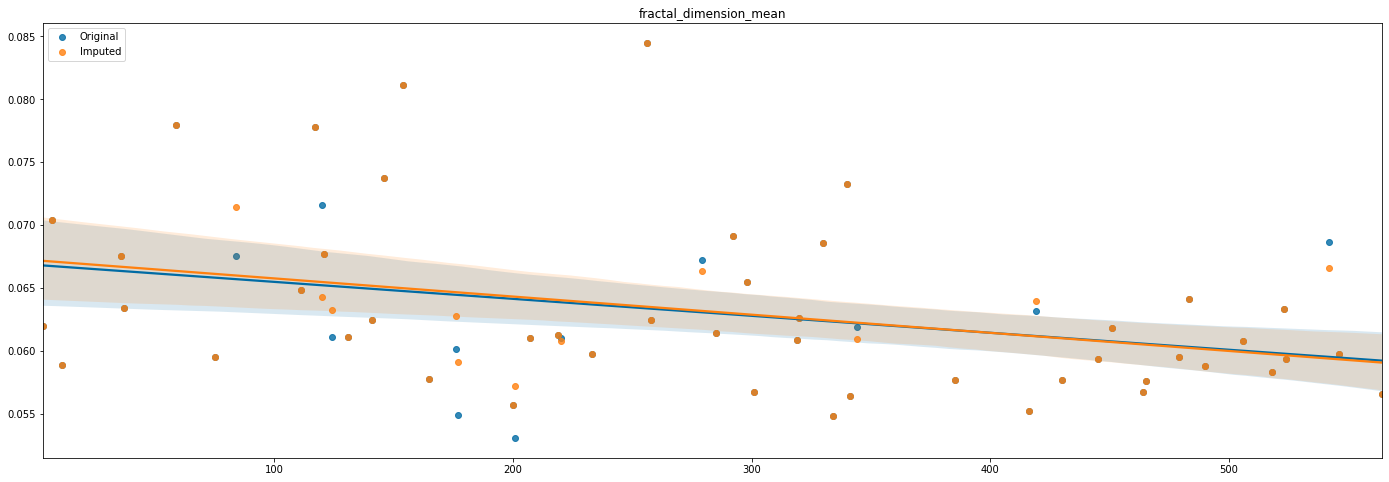

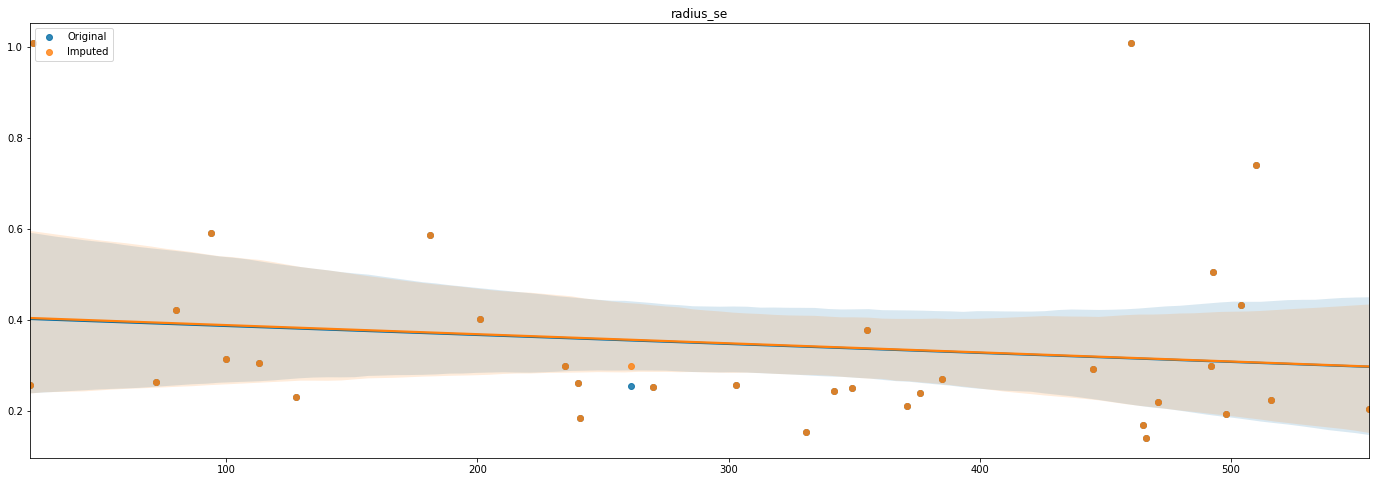

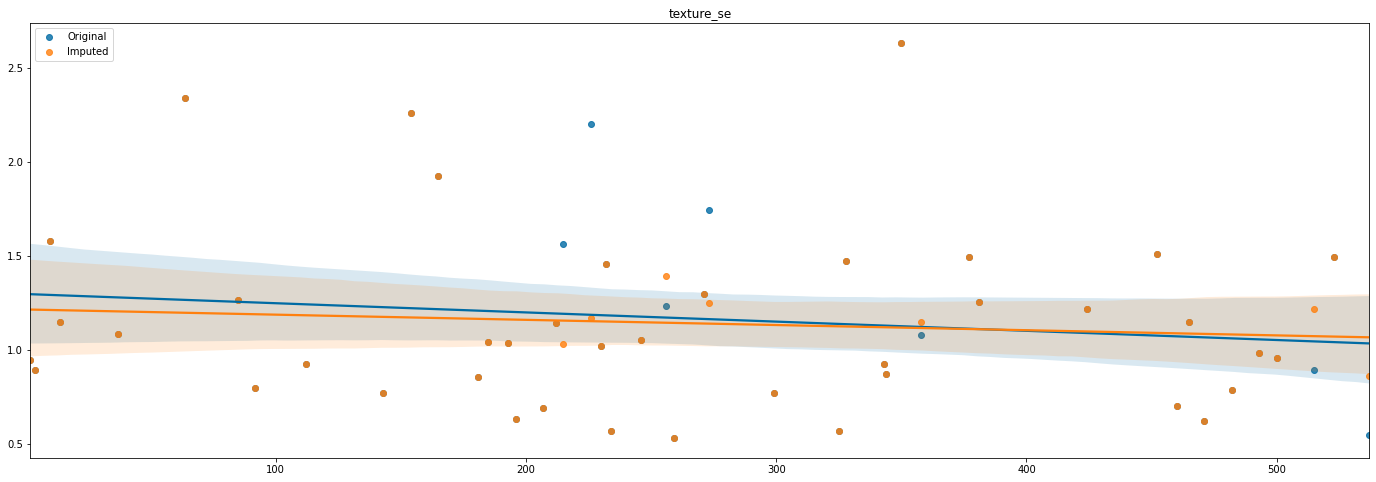

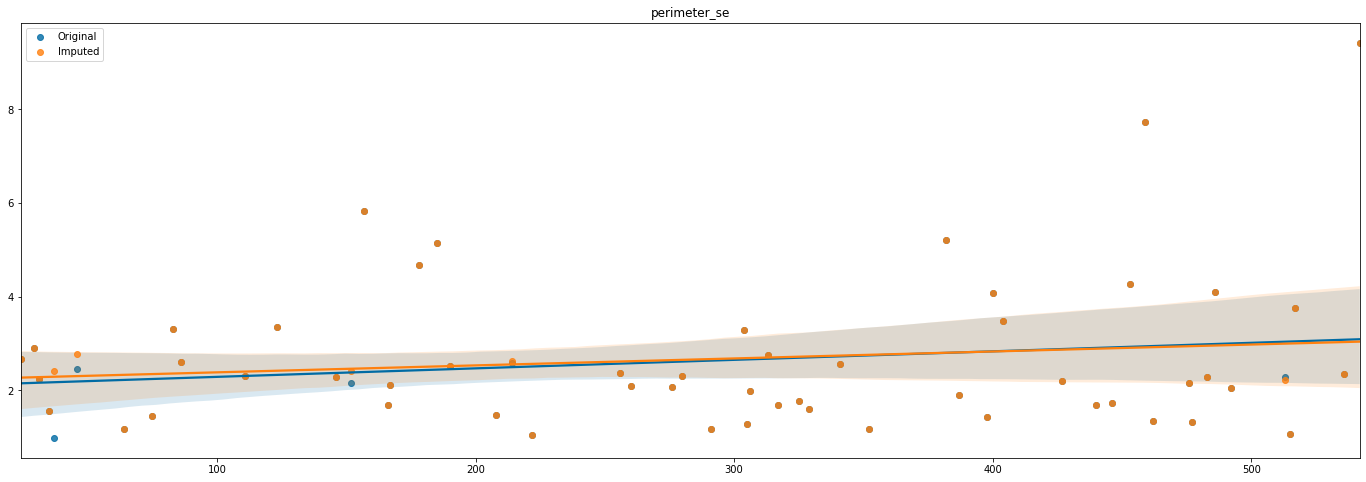

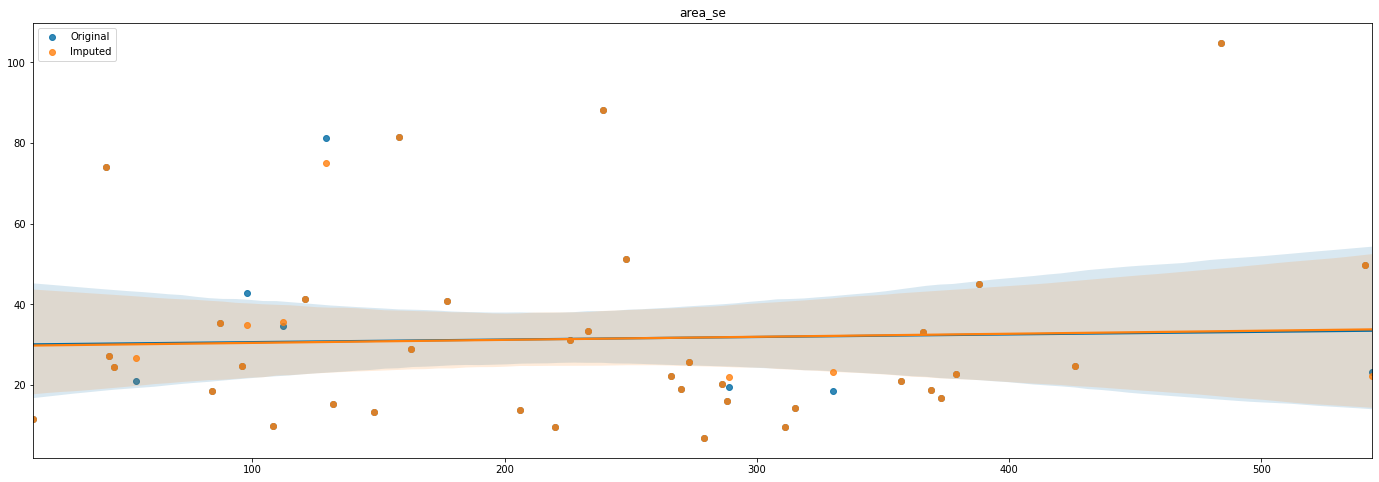

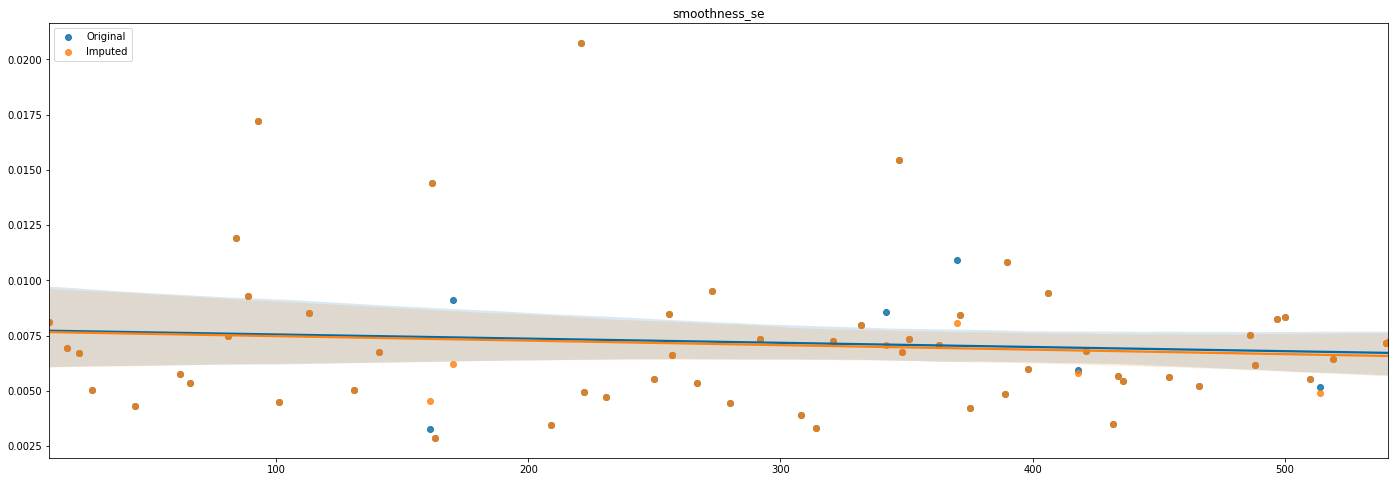

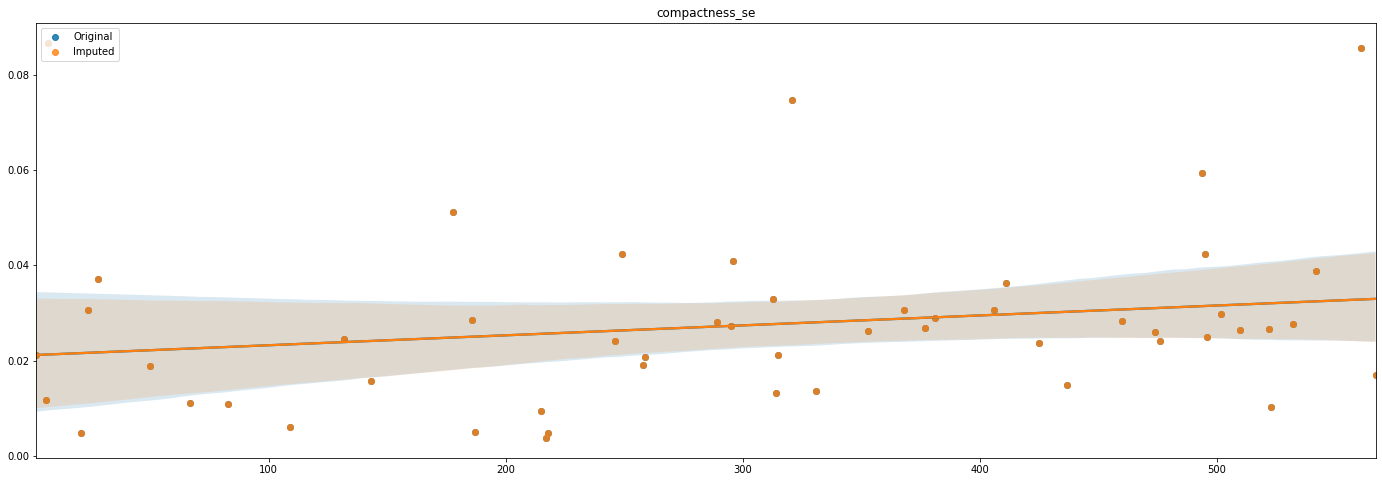

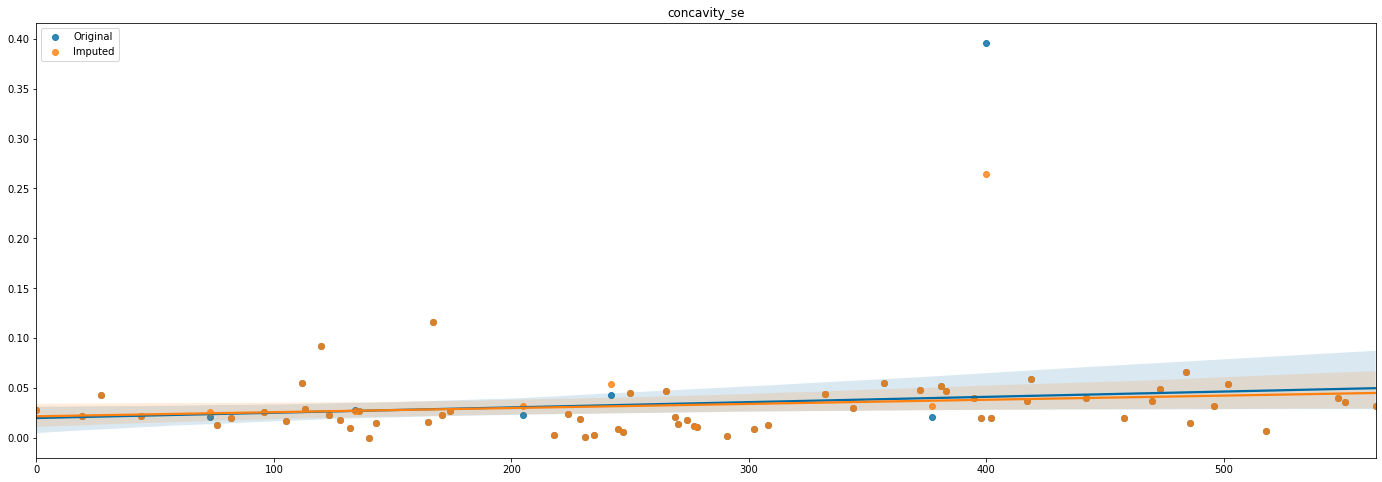

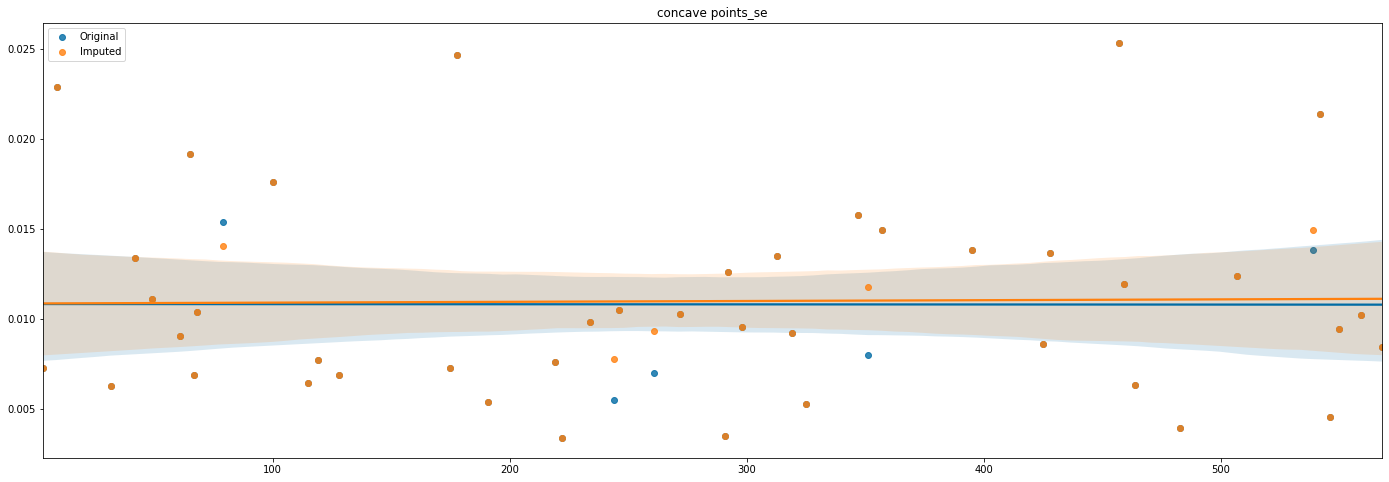

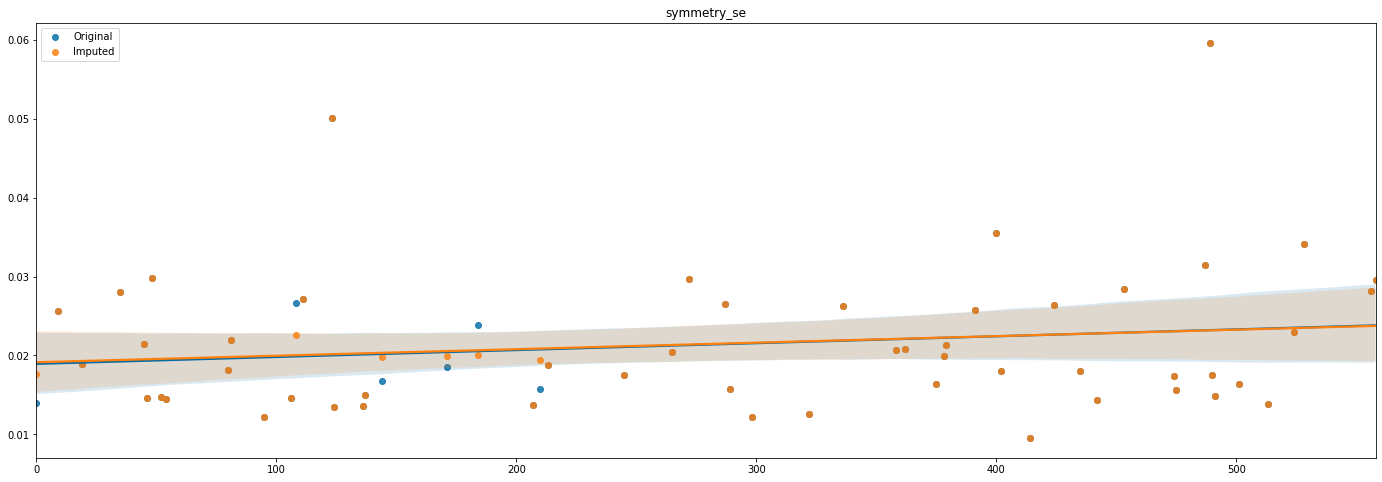

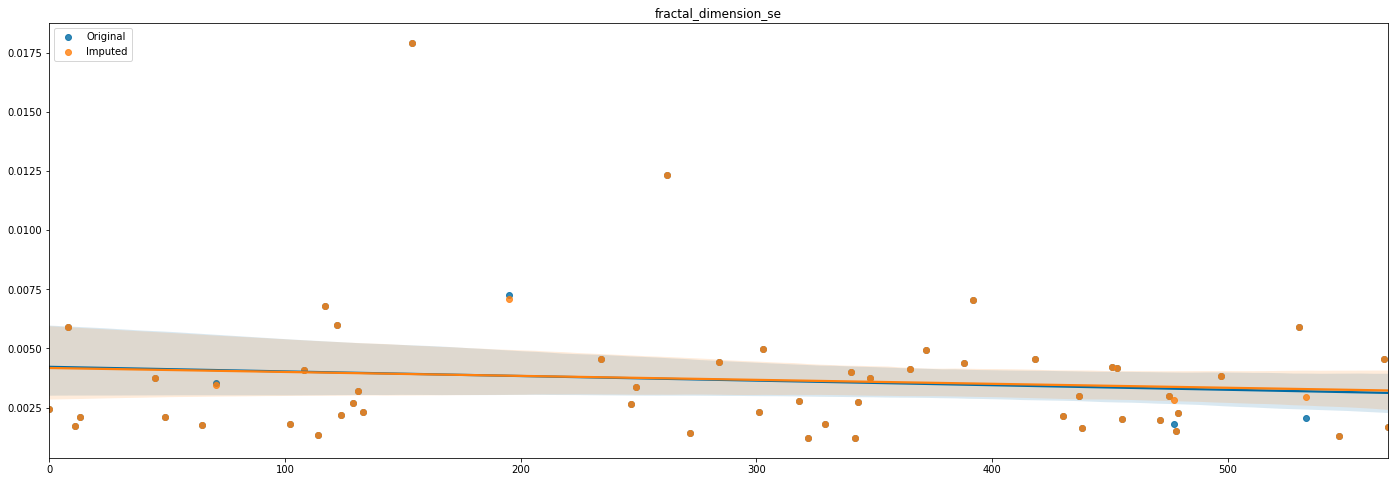

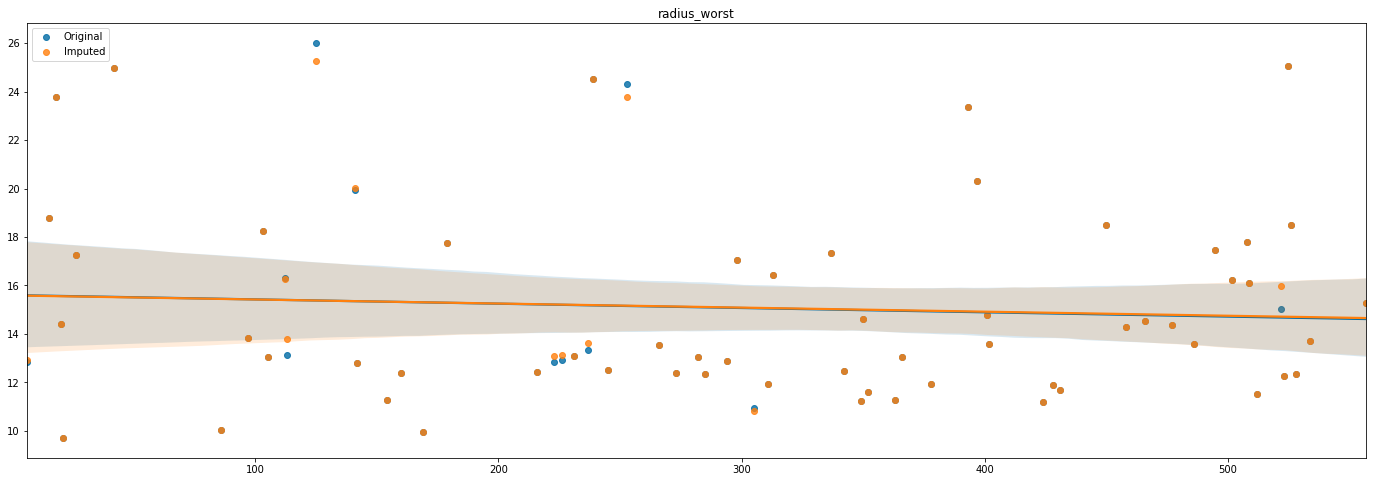

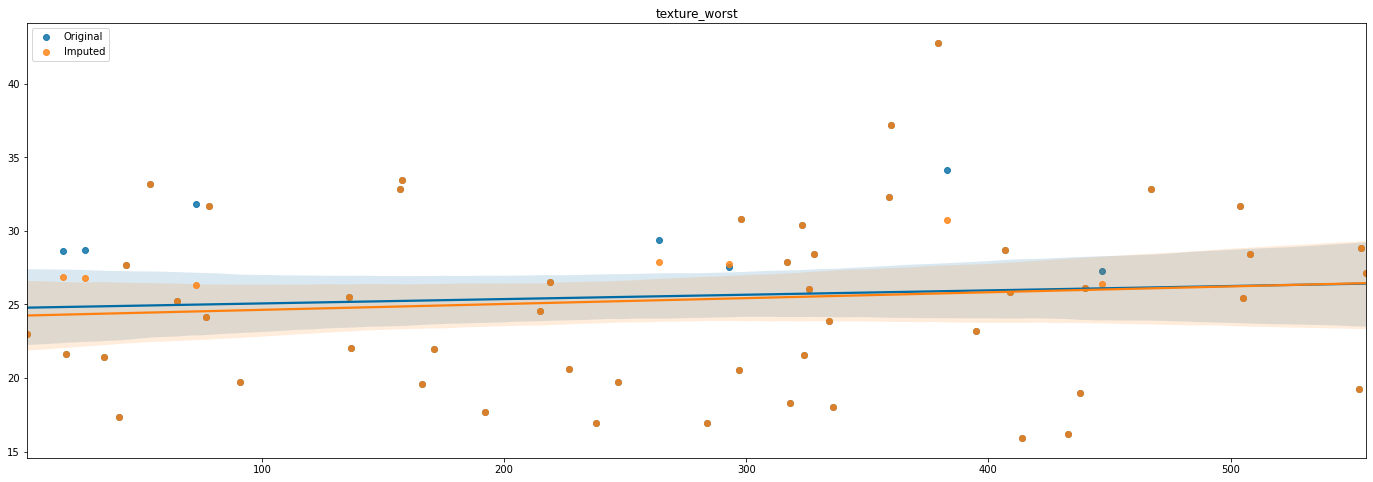

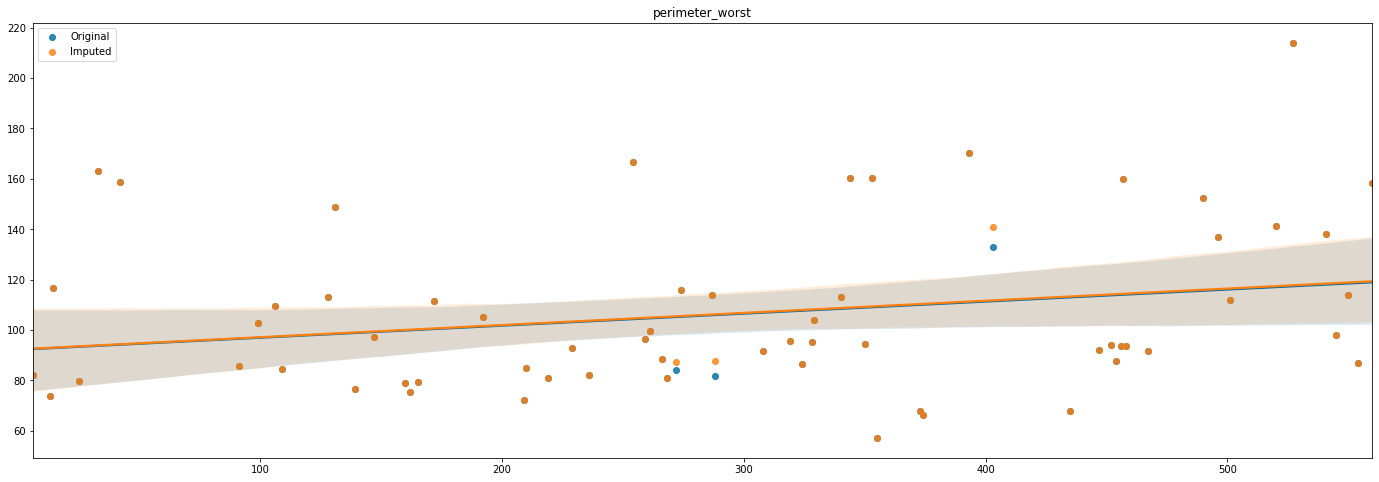

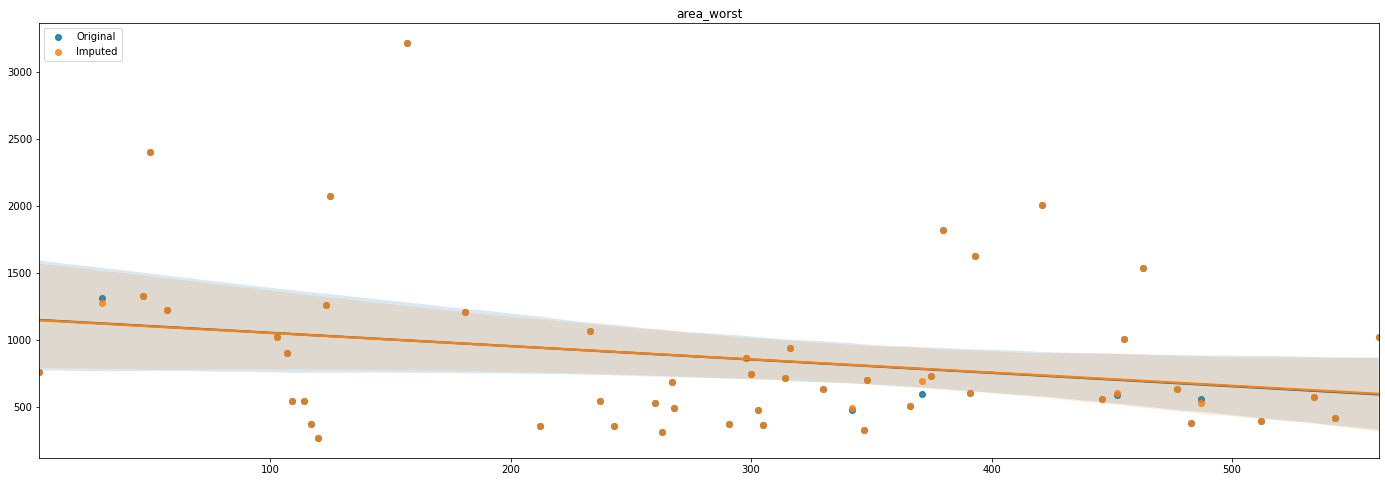

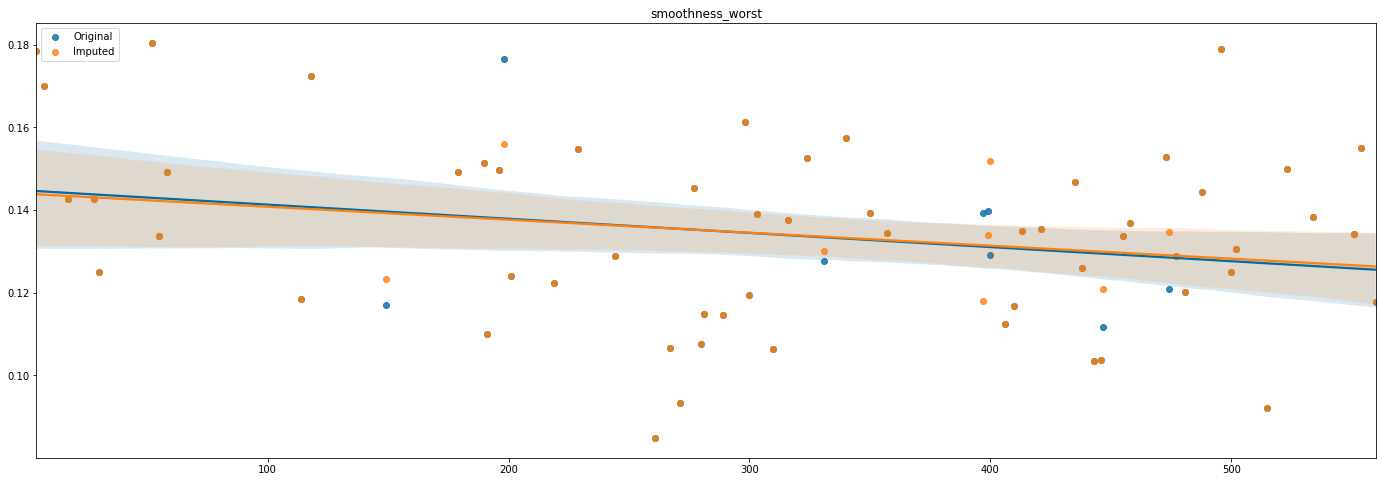

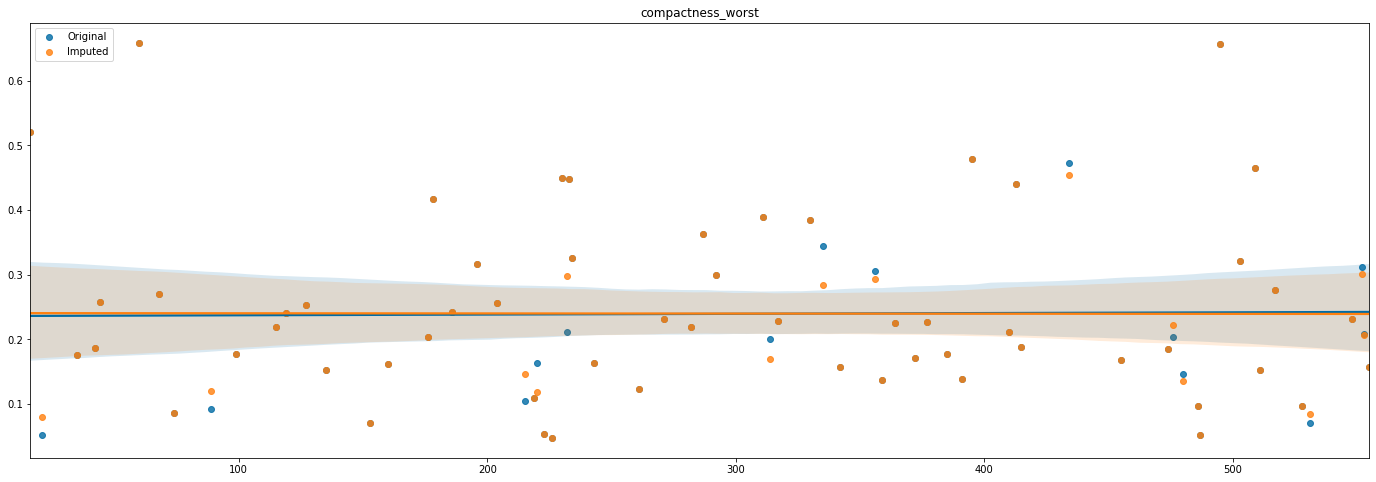

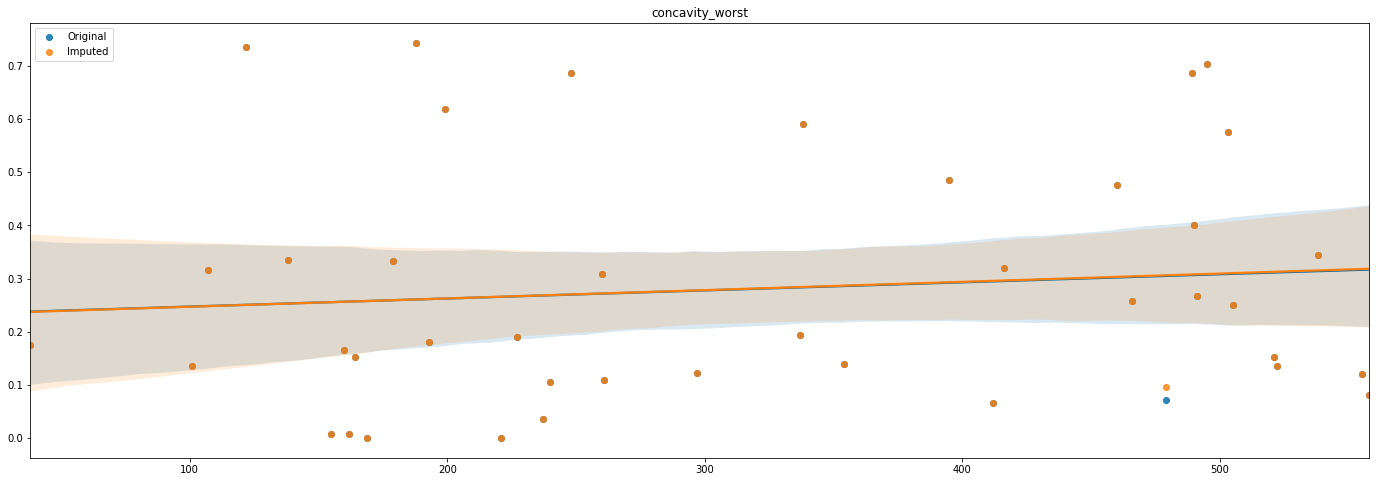

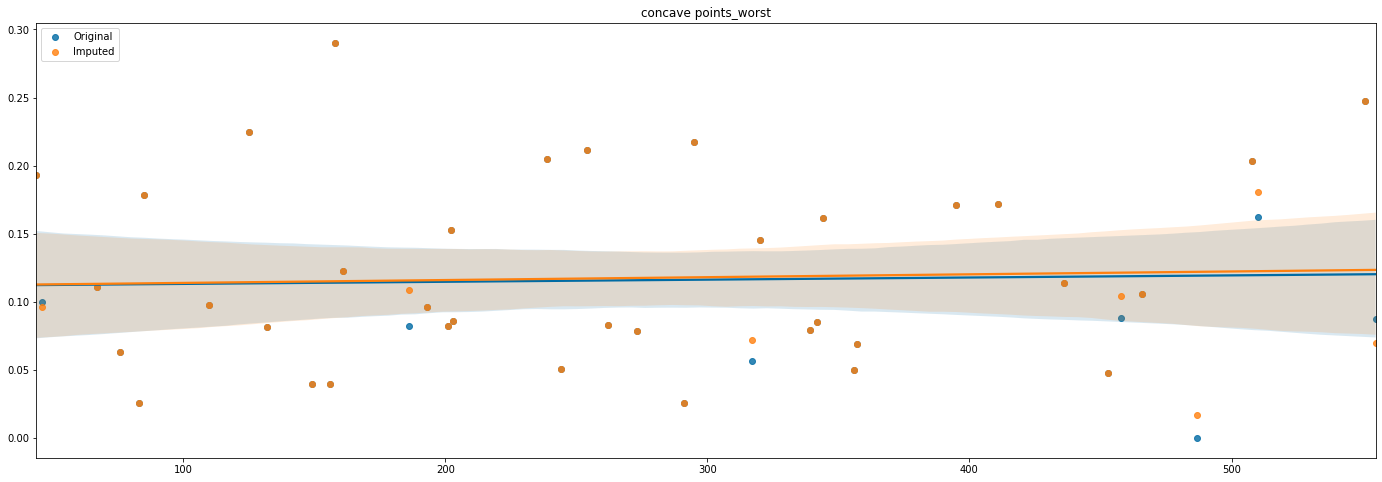

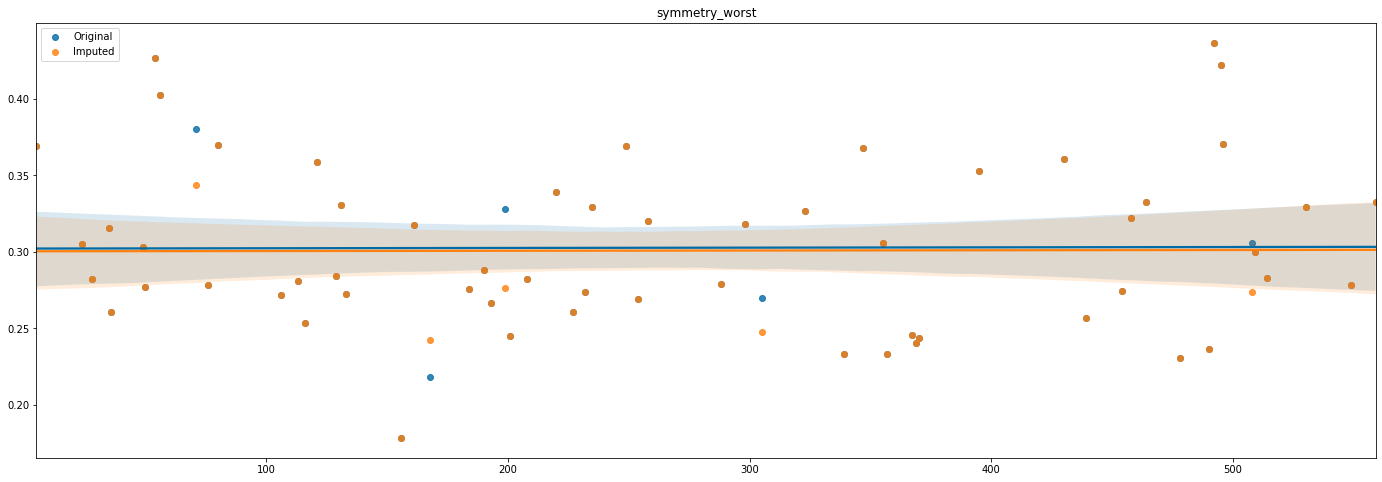

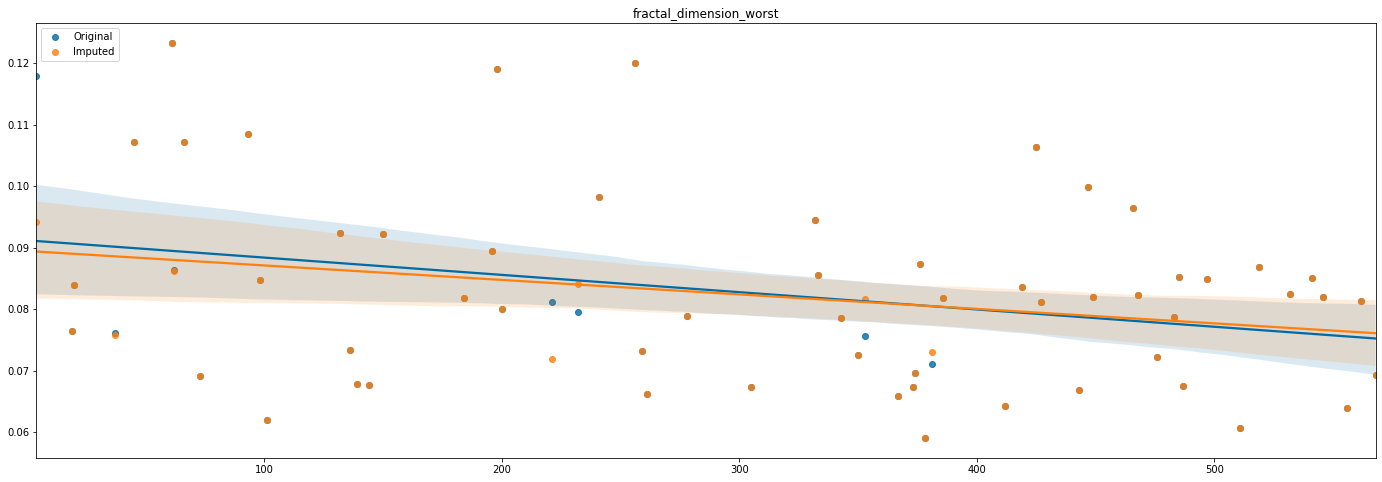

In [ ]:

for x in COLUMNS:
  temp_df = getdf(combined_df,x)
  plotscatterLR(temp_df,x)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [ ]:
data_orig_np = orig_df.values
data_orig_np = data_orig_np / data_orig_np.max(axis=0)
pca = decomposition.PCA(n_components=3)
pc = pca.fit_transform(data_orig_np)


## Principle Component Analysis

**The components formed are highly correlated.**

In [ ]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3'])
pc_df.head()

In [ ]:
pca.explained_variance_ratio_

array([0.59078895, 0.13307833, 0.06474485])

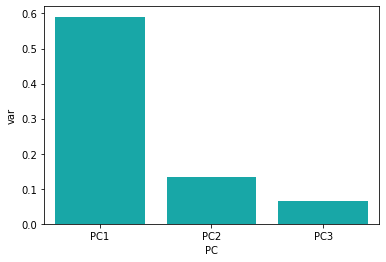

In [ ]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

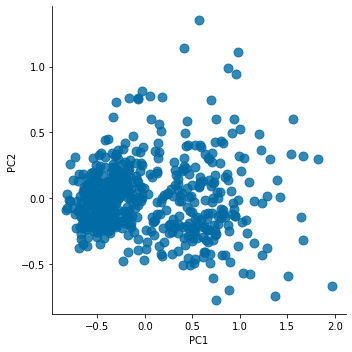

In [ ]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

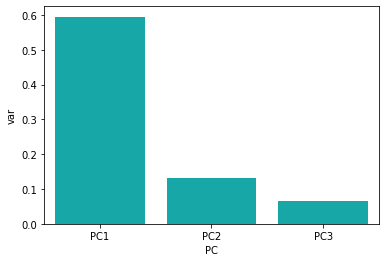

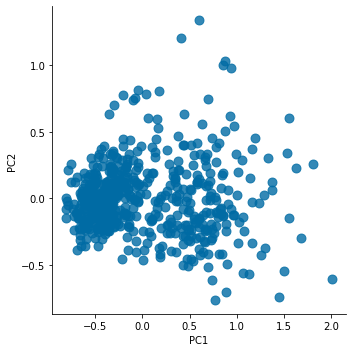

In [ ]:
data_imp_np = imputed_df.values
data_imp_np = data_imp_np / data_imp_np.max(axis=0)
pca = decomposition.PCA(n_components=3)
pc = pca.fit_transform(data_imp_np)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3'])
pc_df.head()
pca.explained_variance_ratio_
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

# 524
[link text](https://)

## Principle Component Analysis for explaining results and errors



We illustrate the application of PCA to the UCI Wisconsin breast cancer dataset in order to reduce it to 2 dimensions, for visualisation if possible.
We scaled the dataset then applied PCA to obtain reduced dimensions. We mapped target classifications (by colour) to the reduced representation and it appears that the reduced representation would be largely (linearly) separable with respect to our imputed vector.
We also used a heatmap to assess the relative importance of all our original features in the 2 PCA components.
Finally, we considered how much of the total variance was explained by each of our principal components.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Original Dataset 
from sklearn.datasets import load_breast_cancer

In [ ]:
print(orig_df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_transform(df, numComponents = 2):
  scaler = StandardScaler()
  scaler.fit(df)
  scaled_data = scaler.transform(df)
  pca = PCA(n_components=numComponents)
  pca.fit(scaled_data)
  X_pca = pca.transform(scaled_data)  # Transform
  return pca, X_pca

In [ ]:
pca, X_pca_orig  = pca_transform(orig_df,2)
X_pca_orig.shape

(569, 2)

PCA for Original Dataset 

Text(0, 0.5, 'Second Principal Component')

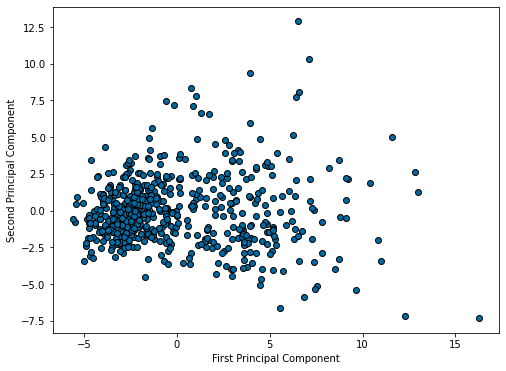

In [ ]:
plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0],X_pca[:,1], c=orig_df['diagnosis'],edgecolor='black', cmap='plasma')
plt.scatter(X_pca_orig[:,0],X_pca_orig[:,1], edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

PCA for imputed dataset 

Text(0, 0.5, 'Second Principal Component')

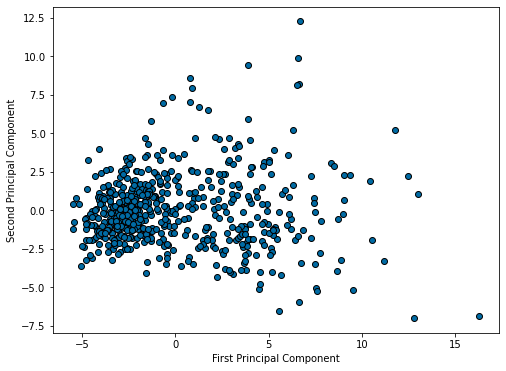

In [ ]:
pca, X_pca_imp  = pca_transform(imputed_df,2)
plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0],X_pca[:,1], c=orig_df['diagnosis'],edgecolor='black', cmap='plasma')
plt.scatter(X_pca_imp[:,0],X_pca_imp[:,1], edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
orig_df.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        1.0        15.46         19.48          101.70      748.9   
1        2.0        12.89         13.12           81.89      515.9   
2        2.0        14.96         19.10           97.03      687.3   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10920           0.12230          0.1466              0.08087   
1          0.06955           0.03729          0.0226              0.01171   
2          0.08992           0.09823          0.0594              0.04819   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.1931                 0.05796     0.4743      0.7859         3.094   
1         0.1337                 0.05581     0.1532      0.4690         1.115   
2         0.1879                 0.05852     0.2877      0.9480         2.171   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0    48.31       0.006240         0.01484       0.02813           0.010930   
1    12.68       0.004731         0.01345       0.01652           0.005905   
2    24.87       0.005332         0.02115       0.01536           0.011870   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.01397              0.002461         19.26          26.00   
1      0.01619              0.002081         13.62          15.54   
2      0.01522              0.002815         16.25          26.19   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            124.9      1156.0           0.15460             0.2394   
1             87.4       577.0           0.09616             0.1147   
2            109.1       809.8           0.13130             0.3030   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.3791               0.15140          0.2837   
1           0.1186               0.05366          0.2309   
2           0.1804               0.14890          0.2962   

   fractal_dimension_worst  
0                  0.08019  
1                  0.06915  
2                  0.08472

In [ ]:
orig_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
imputed_df.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        1.0    15.460000         19.48      104.100181      748.9   
1        2.0    12.006142         13.12       75.266103      515.9   
2        2.0    14.960000         19.10       97.030000      687.3   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10920           0.12230          0.1466             0.080870   
1          0.06955           0.03729          0.0226             0.011710   
2          0.08992           0.09823          0.0594             0.045894   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.1931                 0.05796     0.4743      0.7859      3.094000   
1         0.1337                 0.05581     0.1532      0.4690      1.627055   
2         0.1879                 0.05852     0.2877      0.9480      2.171000   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0    48.31       0.006240         0.01484       0.02813           0.010930   
1    12.68       0.004731         0.01345       0.01652           0.005905   
2    24.87       0.005332         0.02115       0.01536           0.011870   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     0.017643              0.002461         19.26          26.00   
1     0.016190              0.002081         13.62          15.54   
2     0.015220              0.002815         16.25          26.19   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            124.9      1156.0          0.154600             0.2394   
1             87.4       577.0          0.115862             0.1147   
2            109.1       809.8          0.131300             0.3030   

   concavity_worst  concave points_worst  symmetry_worst  \
0          0.37910               0.15140        0.283700   
1          0.11860               0.05366        0.230900   
2          0.31895               0.14890        0.304403   

   fractal_dimension_worst  
0                  0.08019  
1                  0.06915  
2                  0.08472

In [ ]:
'''del orig_df['id']
del orig_df['Unnamed: 0']
del imputed_df['id']
del imputed_df['Unnamed: 0']
del imputed_df['Unnamed: 0.1']'''
orig_df['Imputed'] = 0
imputed_df['Imputed'] = 1

In [ ]:
# stack dataframes vertically 
pca_df = orig_df.append(imputed_df, ignore_index=True)

PCA for all features

Text(0.5, 1.0, 'Scatter plot for PCA of Original and Imputed Data')

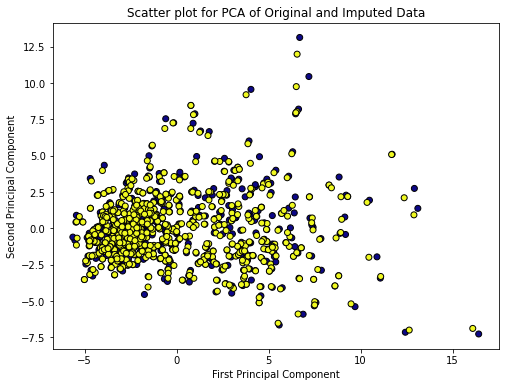

In [ ]:
pca, X_pca_merged  = pca_transform(pca_df,2)
plt.figure(figsize=(8,6))
plt.scatter(X_pca_merged[:,0],X_pca_merged[:,1], c=pca_df['Imputed'],edgecolor='black', cmap='plasma', label = pca_df['Imputed'])
#plt.scatter(X_pca[:,0],X_pca_orig[:,1], edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot for PCA of Original and Imputed Data')


In PCA components don't correspond directly to particular features.

In [ ]:
df_components = pd.DataFrame(pca.components_,columns=orig_df.columns)

In [ ]:
df_components

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  -0.216923     0.217059      0.103041        0.225992   0.218976   
1   0.078972    -0.226045     -0.060260       -0.203904  -0.221725   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.135573          0.231549        0.251276             0.255449   
1         0.187989          0.159021        0.068430            -0.026738   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0       0.127939                0.057593   0.203087    0.015932      0.205658   
1       0.187012                0.368626  -0.096040    0.090400     -0.080329   

    area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0  0.199273       0.011287        0.160357      0.149544           0.174867   
1 -0.142608       0.204835        0.239614      0.205213           0.139942   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     0.037983              0.094024      0.225237       0.103577   
1     0.183865              0.286810     -0.212945      -0.042436   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         0.234294    0.222329          0.122409           0.203657   
1        -0.192684   -0.211728          0.173465           0.150507   

   concavity_worst  concave points_worst  symmetry_worst  \
0         0.222851              0.246178        0.122644   
1         0.105403             -0.003004        0.138713   

   fractal_dimension_worst   Imputed  
0                 0.126469  0.000075  
1                 0.279083 -0.000705

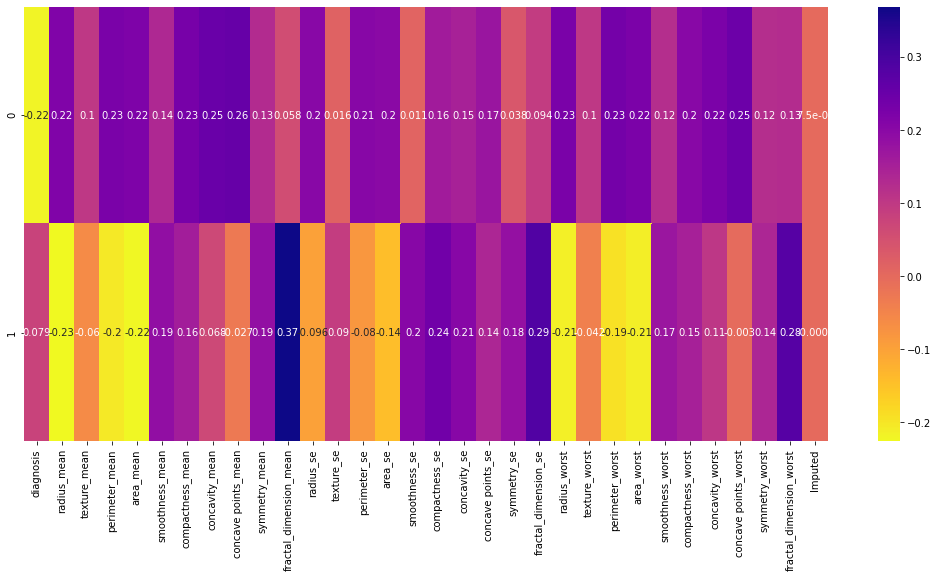

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df_components,cmap='plasma_r', annot=True)

### Selcting combinations of features and performig PCA 

In [ ]:
imp_features = df_components.columns.to_list()
imp_features = imp_features[:5] 
#+ [imp_features[-1]]

In [ ]:
print(imp_features)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

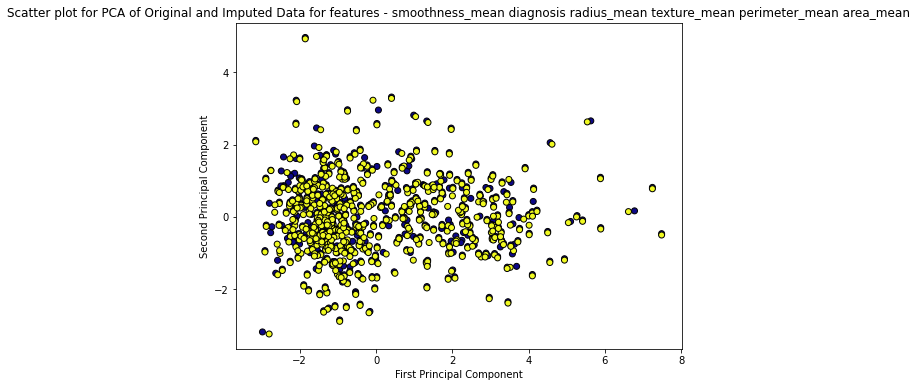

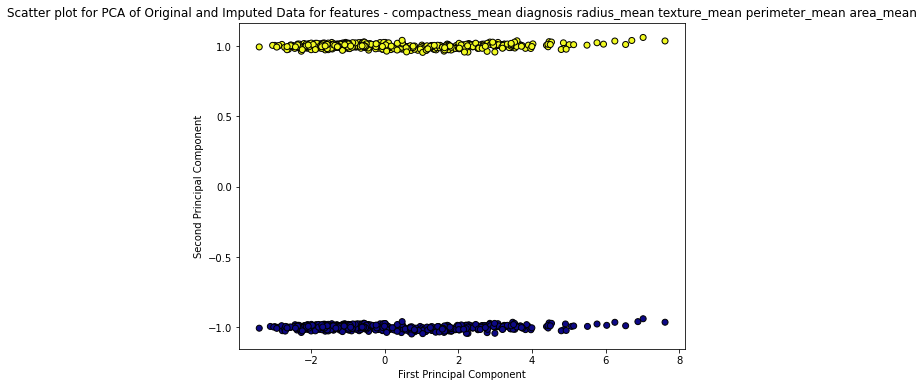

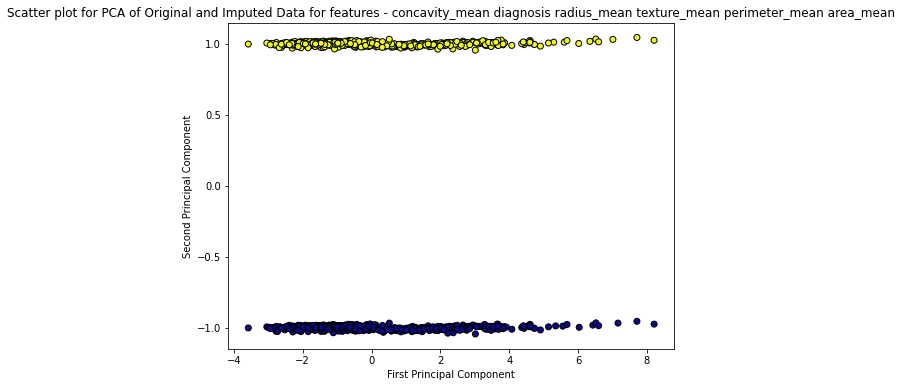

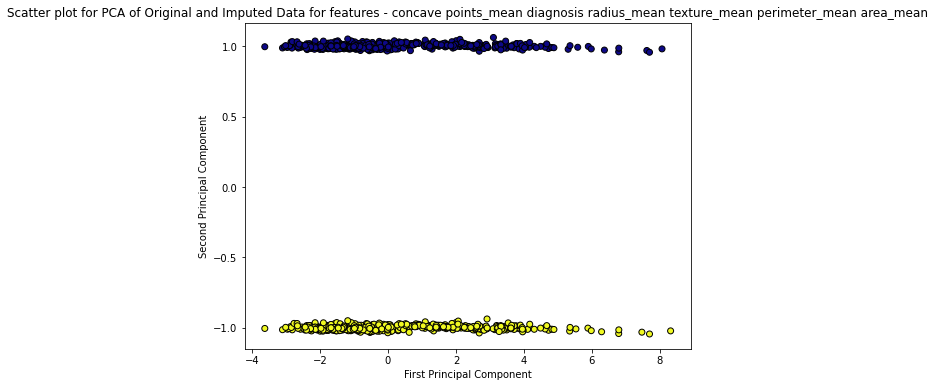

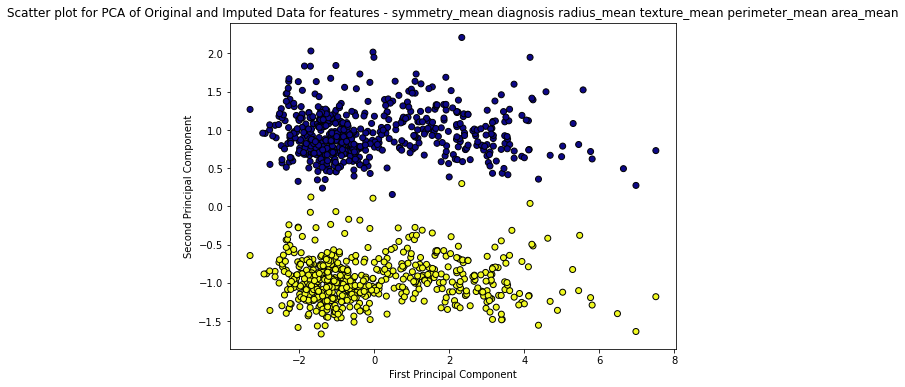

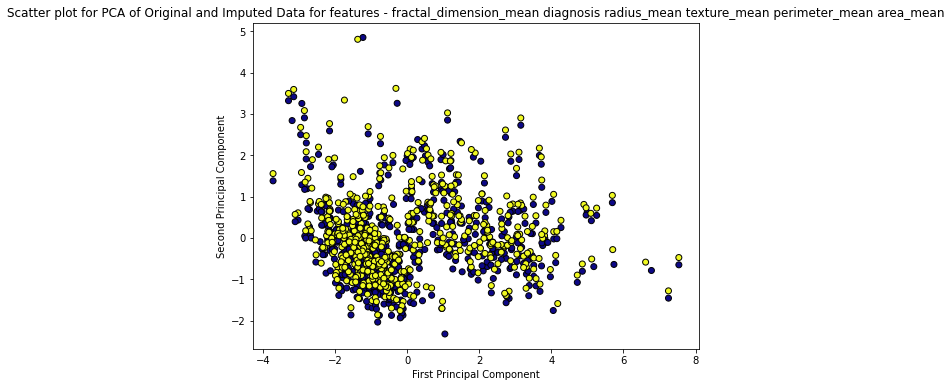

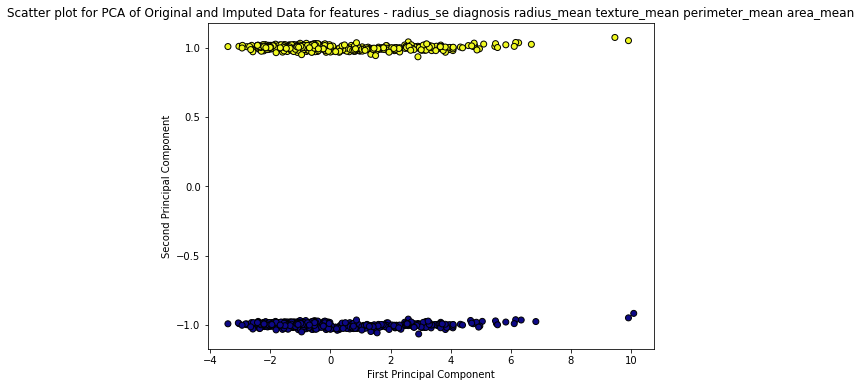

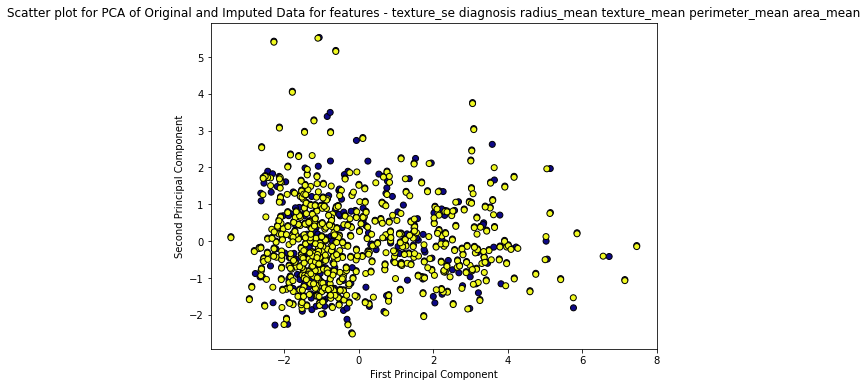

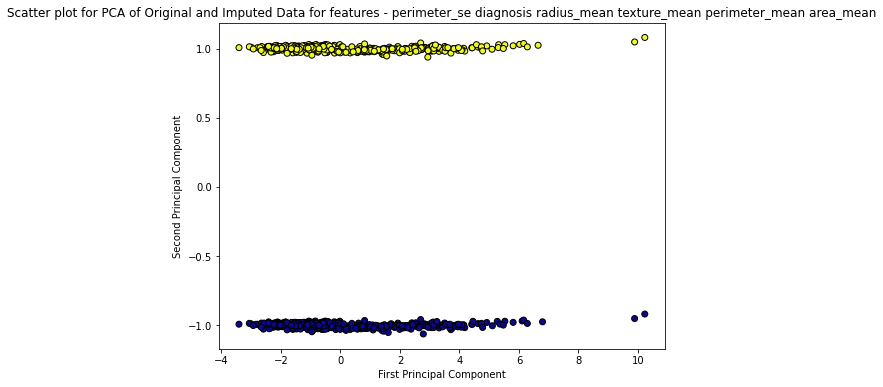

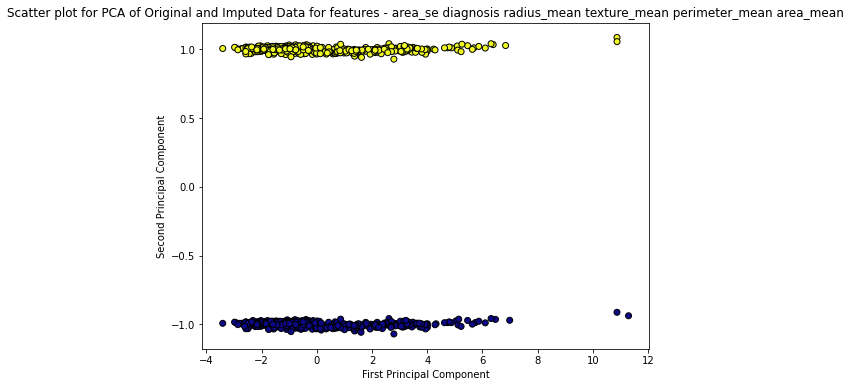

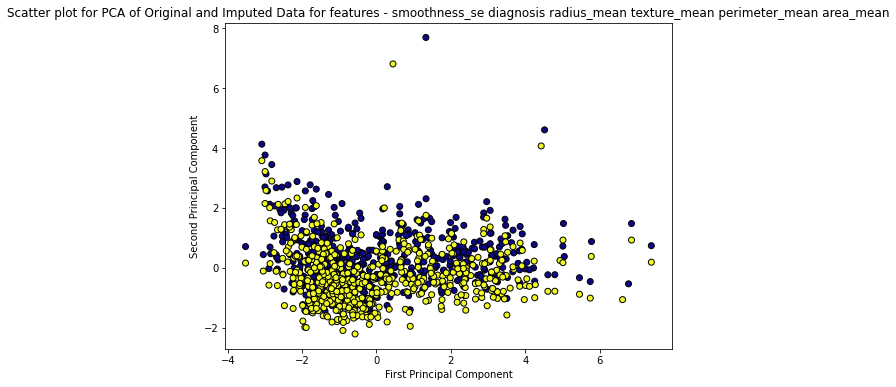

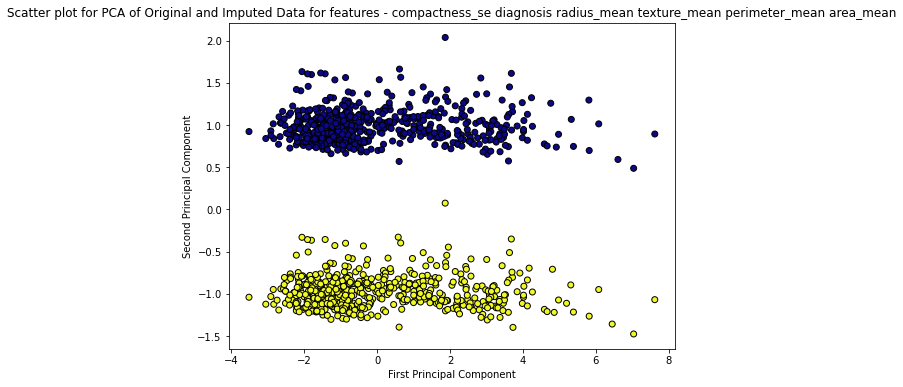

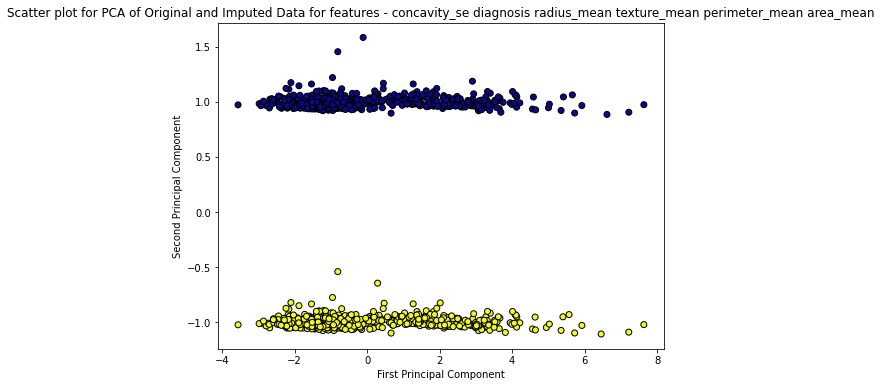

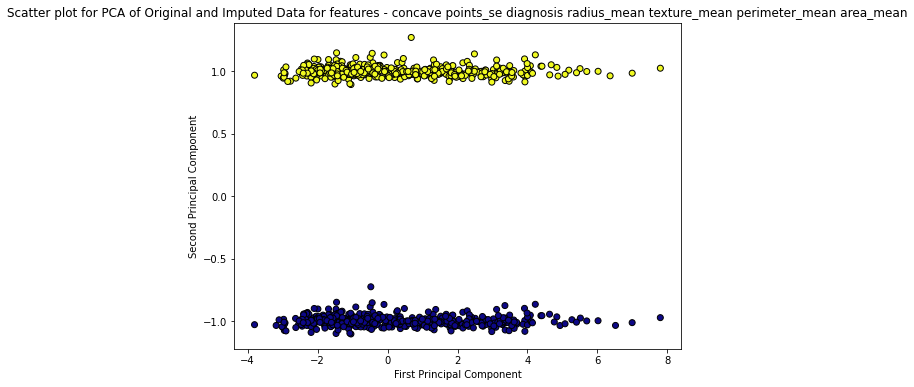

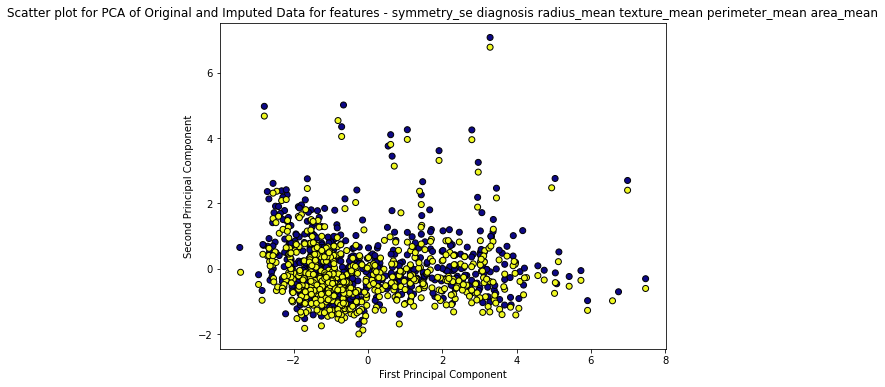

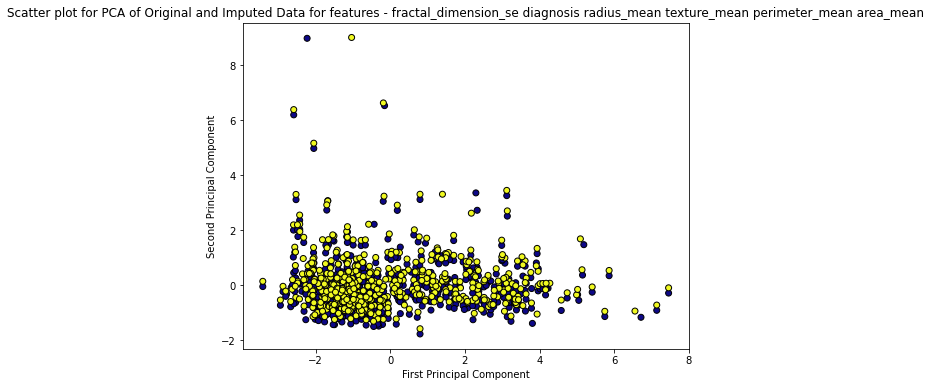

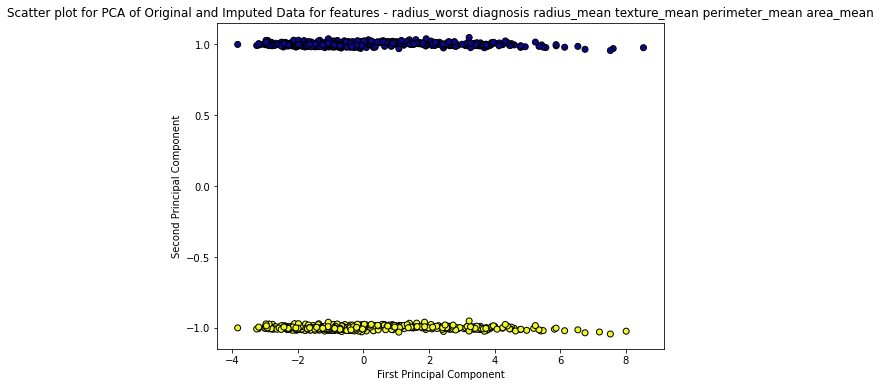

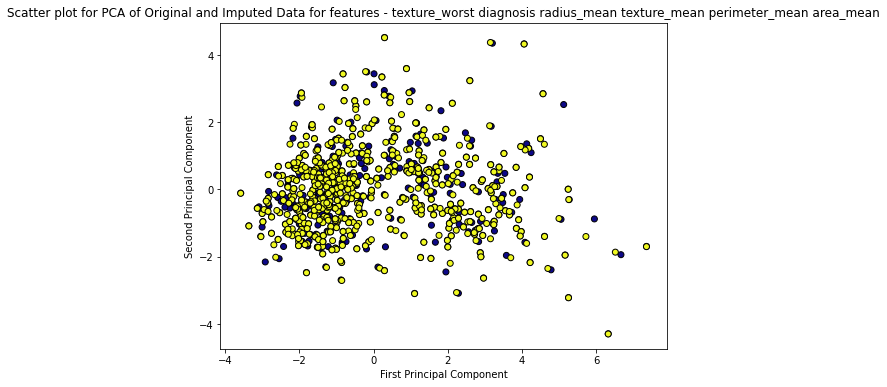

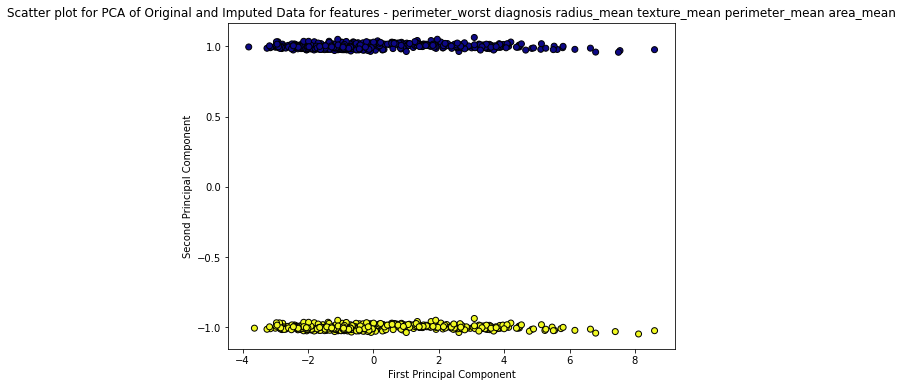

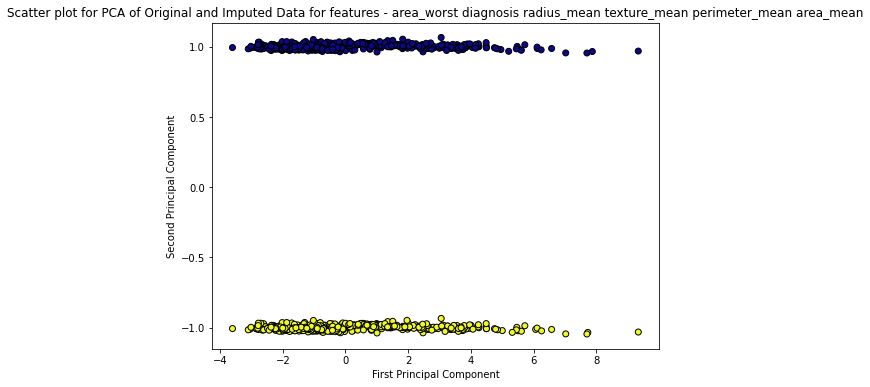

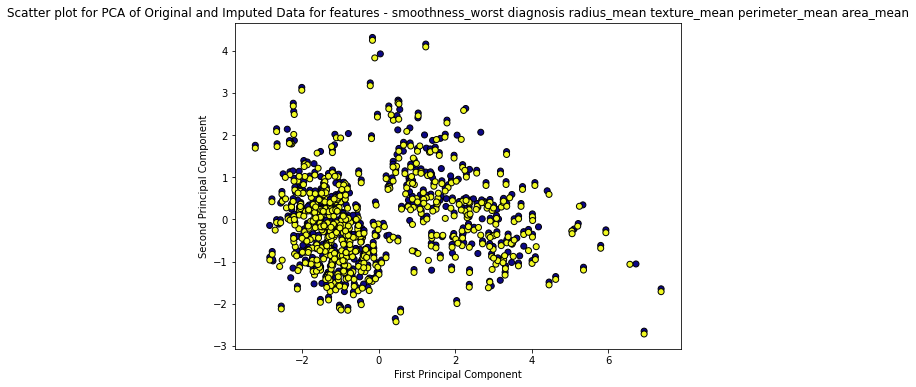

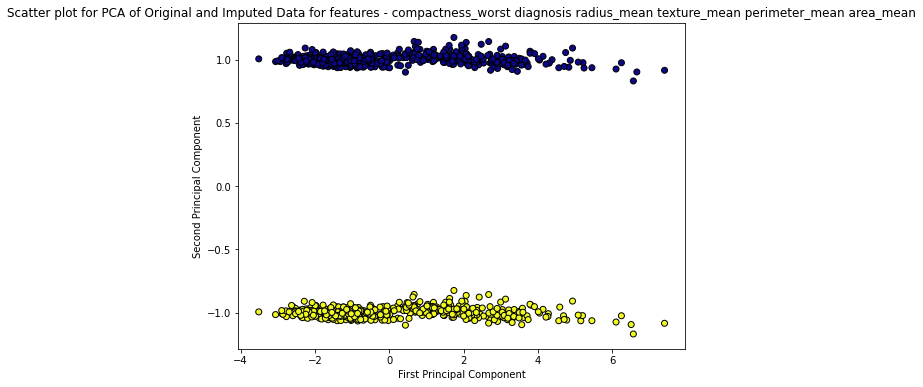

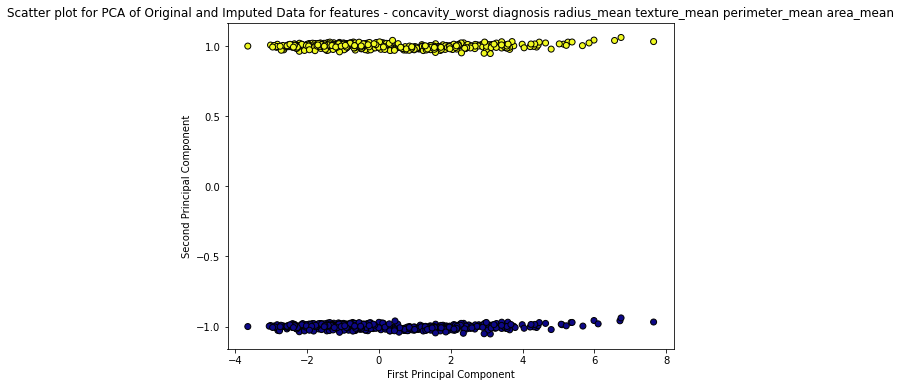

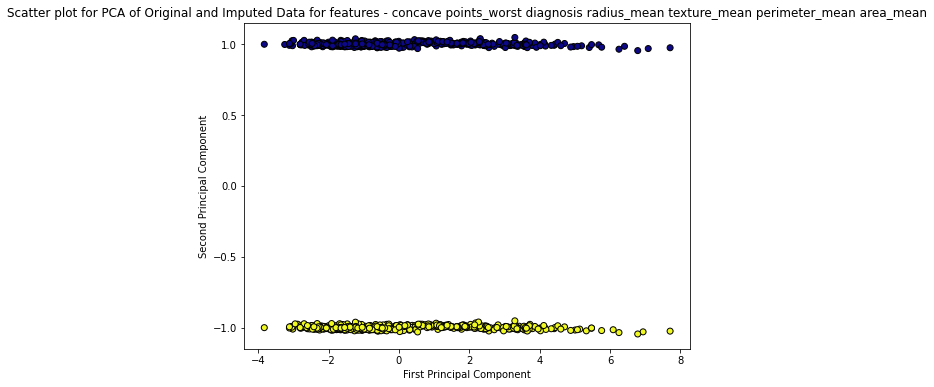

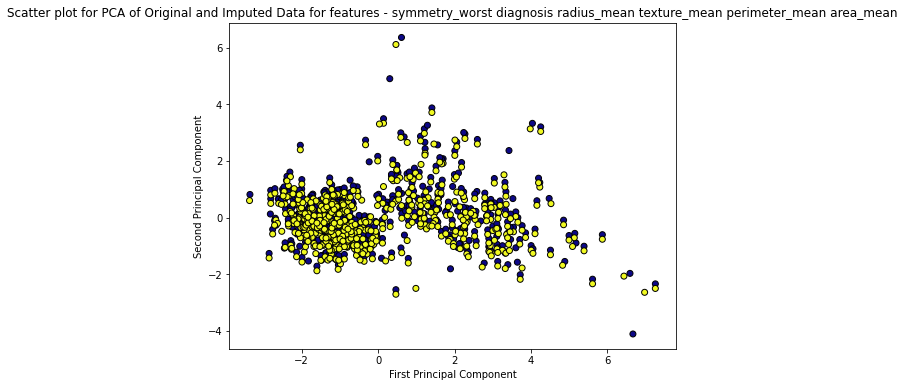

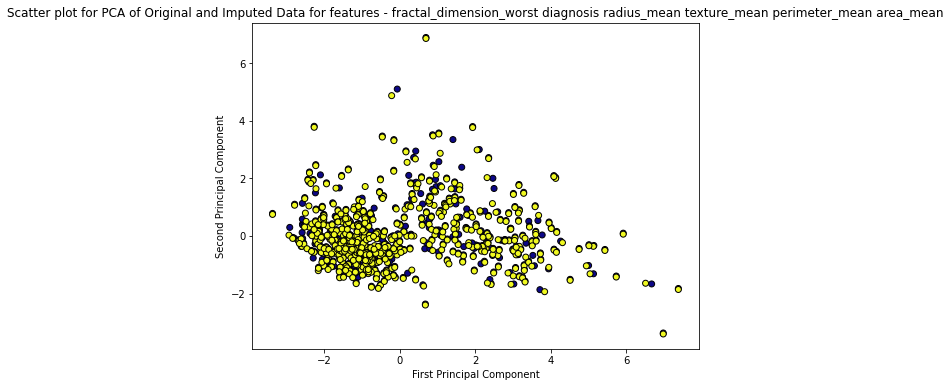

In [ ]:
for i in df_components.columns.to_list():
  if i not in imp_features and i != 'Imputed':
    feats = [i, 'Imputed'] + imp_features
    df = pca_df[feats]
    feats.remove('Imputed')
    pca, X_pca  = pca_transform(df,3)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0],X_pca[:,1], c=df['Imputed'],edgecolor='black', cmap='plasma')
    #plt.scatter(X_pca[:,0],X_pca_orig[:,1], edgecolor='black')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    s = 'Scatter plot for PCA of Original and Imputed Data for features - ' + ' '.join(feats)
    plt.title(s)



In [ ]:
for i in imp_features:
  for j in imp_features:
    if i != j:
      # create pca plot
      features = [i,j,'Imputed'] 
      df = pca_df[features]
      pca, X_pca  = pca_transform(df,2)
      plt.figure(figsize=(8,6))
      plt.scatter(X_pca[:,0],X_pca[:,1], c=df['Imputed'],edgecolor='black', cmap='plasma')
      #plt.scatter(X_pca[:,0],X_pca_orig[:,1], edgecolor='black')
      plt.xlabel('First Principal Component')
      plt.ylabel('Second Principal Component')
      s = 'Scatter plot for PCA of Original and Imputed Data for fratures - '+ i+' and '+ j
      plt.title(s)


Text(0.5, 1.0, 'Scatter plot for PCA of Original and Imputed Data')

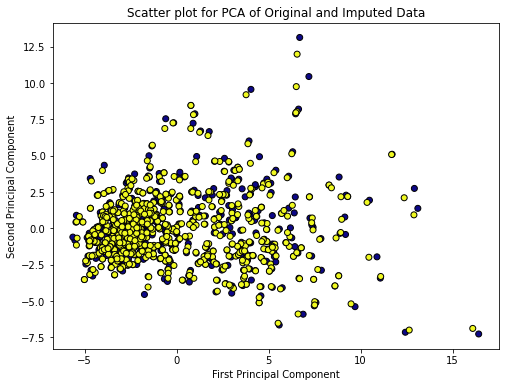

In [ ]:
pca, X_pca_merged  = pca_transform(pca_df,2)
plt.figure(figsize=(8,6))
plt.scatter(X_pca_merged[:,0],X_pca_merged[:,1], c=pca_df['Imputed'],edgecolor='black', cmap='plasma', label = pca_df['Imputed'])
#plt.scatter(X_pca[:,0],X_pca_orig[:,1], edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot for PCA of Original and Imputed Data')


### Bivariate Scatter Plots

To understand the error in a multivariate sense via appropriate data visualizations. We pick two variables from the dataset, say var 1 and var 2, and make a bivariate scatterplot with all data points.
Scatterplots are essential for diagnosing relationships, to find out how to summarize it best and whether the tools you intend to use to summarize the relationship are applicable

(Professor Notes: Then pick a few data points, remove their var 1 (and/or var 2) values and impute them. Make another bivariate scatterplot and show this dataset. Or better, use the previous  scatterplot, highlight the datapoints where you did imputations (say in green) and plot the new imputed data points (say in red). You could even mark in color if you imputed in var 1 or var 2 or both with a specific color (so instead of green you would use green, yellow, and orange, respectively).
Then later on we can use visualizations like scatterplot matrix, PCA plot or MDS to see errors in the context of more variables. )


In [ ]:
def scatter_plot(col1, col2):
  # visualize original and imputed values 
  # original in colour, imputed in colour 
  plt.figure(figsize=(8,6))
  plt.scatter(pca_df[col1],pca_df[col2], c = pca_df['Imputed'], alpha = 0.5, cmap='RdYlGn', label = pca_df['Imputed'])
  #plt.scatter(X_pca[:,0],X_pca_orig[:,1], edgecolor='black')
  plt.xlabel('First feature' + col1)
  plt.ylabel('Second feature'+ col2)
  plt.title('Scatter plot for featurures - ' + col1 + ' ,'+ col2+' showing Original and Imputed Data')

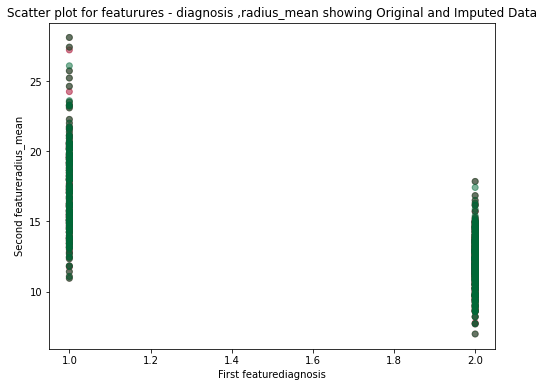

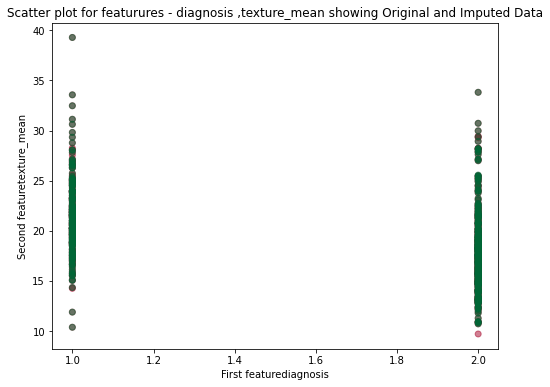

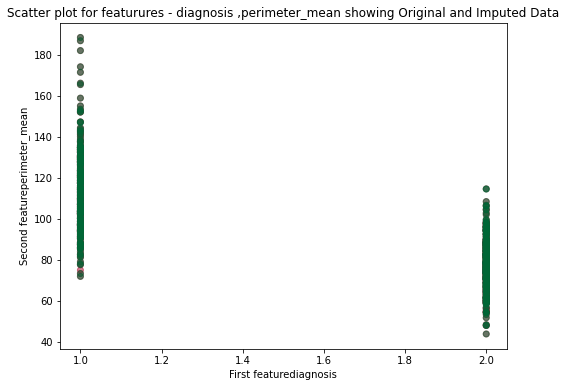

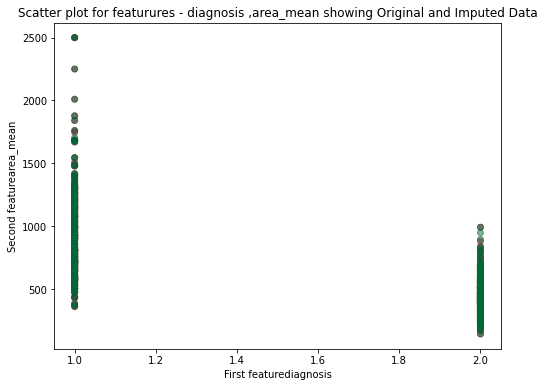

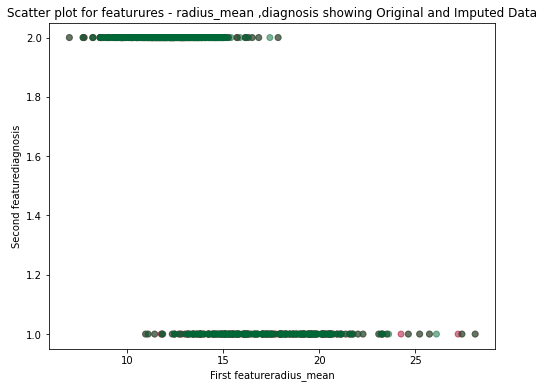

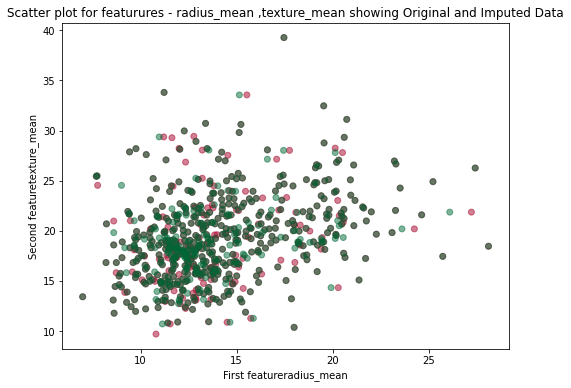

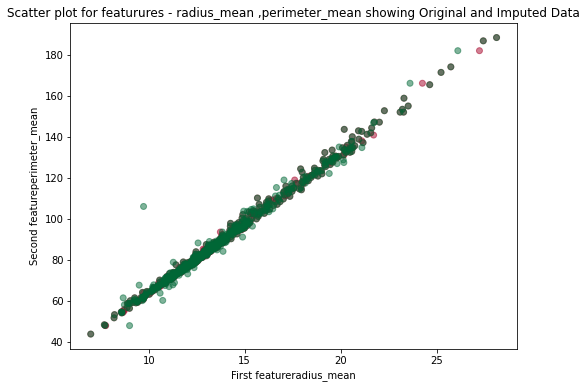

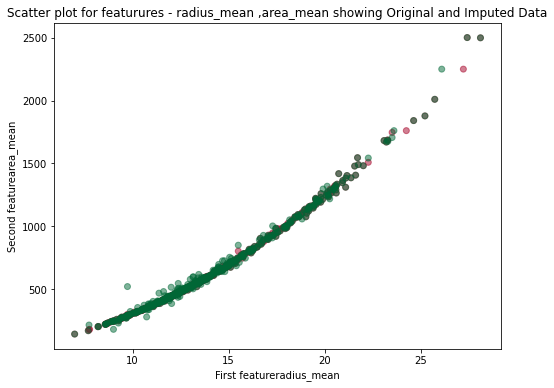

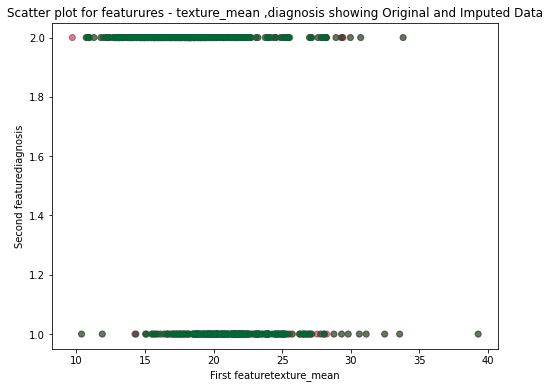

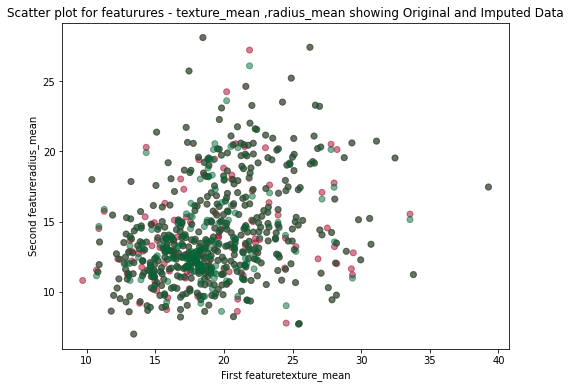

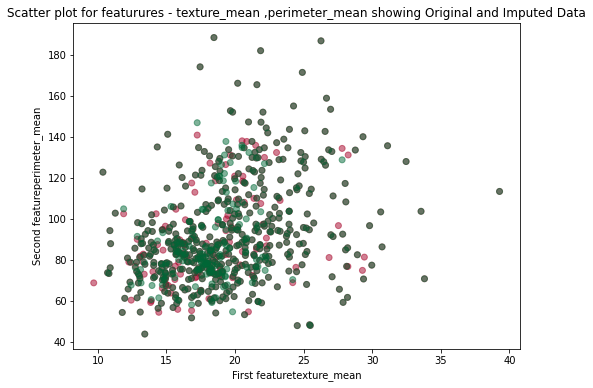

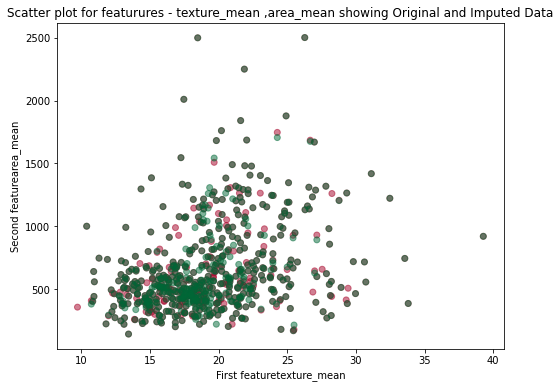

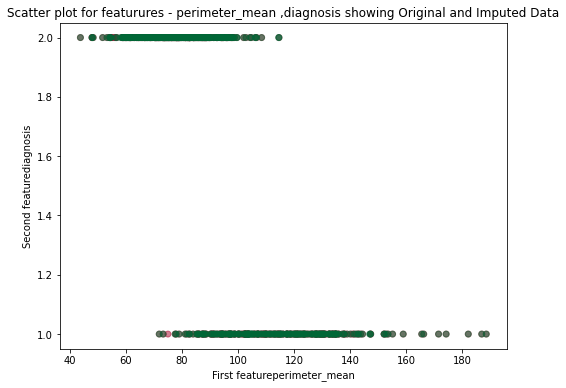

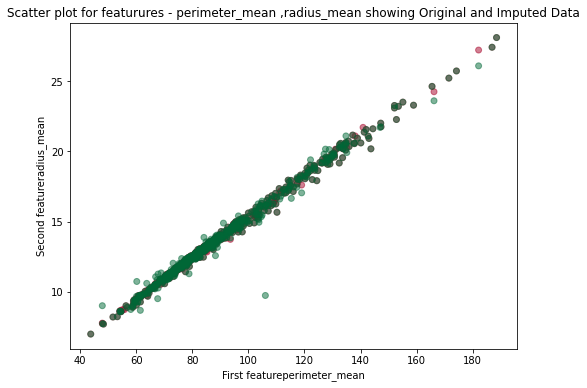

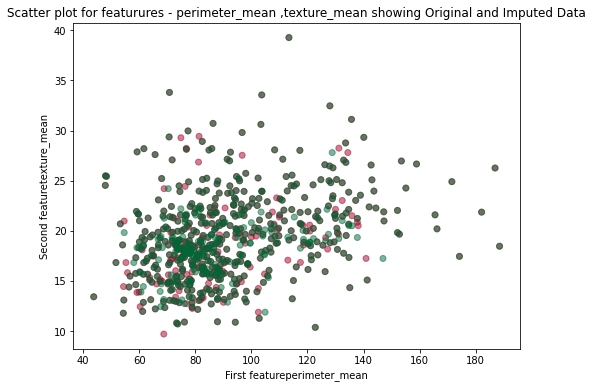

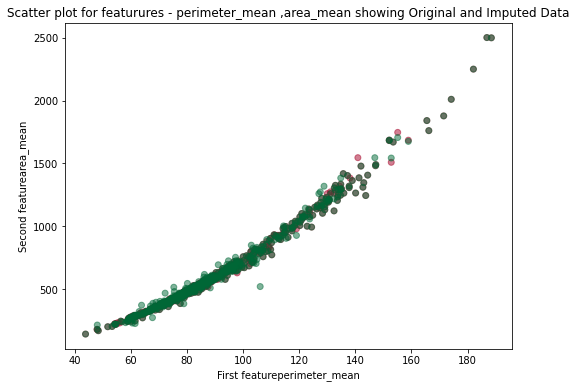

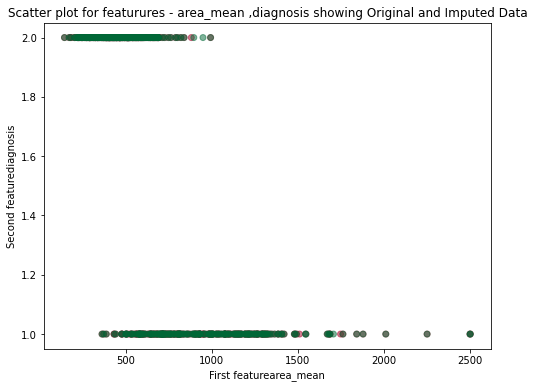

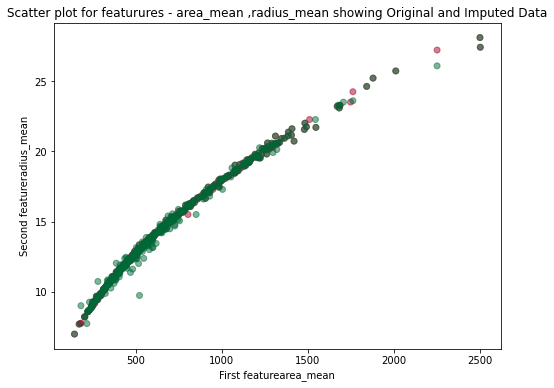

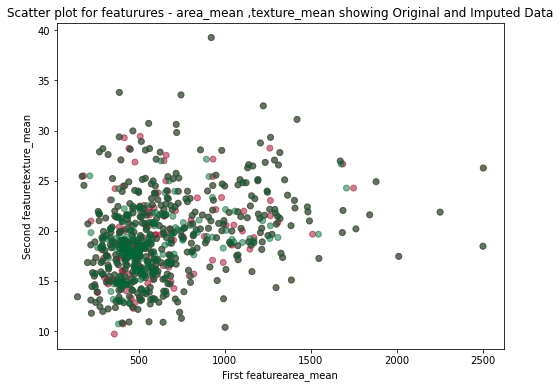

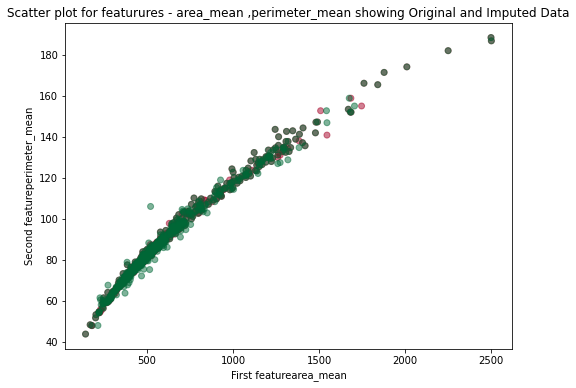

In [ ]:
for i in imp_features:
  for j in imp_features:
    if i != j:
      scatter_plot(i, j)